# Week 3: Quadratic Functions

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 3 of 12

## Learning Objectives
- Quadratic equations and roots
- Completing the square
- Vertex form and graphing
- Applications in optimization
- Parabolic trajectories


In [33]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import optimize, integrate
from scipy.optimize import minimize_scalar
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Configuration
np.random.seed(42)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'

# SymPy configuration
sp.init_printing(use_unicode=True)

print("=" * 70)
print("WEEK 3: QUADRATIC FUNCTIONS")
print("=" * 70)
print("\n✓ All libraries loaded successfully")
print("✓ Environment configured")
print("\nLibraries:")
print(f"  • NumPy: {np.__version__}")
print(f"  • Pandas: {pd.__version__}")
print(f"  • Matplotlib: {plt.matplotlib.__version__}")
print(f"  • SciPy: {scipy.__version__}")
print(f"  • SymPy: {sp.__version__}")

WEEK 3: QUADRATIC FUNCTIONS

✓ All libraries loaded successfully
✓ Environment configured

Libraries:
  • NumPy: 2.0.2
  • Pandas: 2.3.3
  • Matplotlib: 3.9.4
  • SciPy: 1.13.1
  • SymPy: 1.14.0


## 1. Quadratic Equations and Roots

### Definition
A **quadratic equation** is a polynomial equation of degree 2:

$$ax^2 + bx + c = 0$$

where $a \neq 0$, and $a$, $b$, $c$ are constants (coefficients).

### Standard Forms
1. **General Form**: $ax^2 + bx + c = 0$
2. **Vertex Form**: $a(x - h)^2 + k = 0$
3. **Factored Form**: $a(x - r_1)(x - r_2) = 0$

### The Quadratic Formula
The **roots** (solutions) of $ax^2 + bx + c = 0$ are:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

### Discriminant
The **discriminant** $\Delta = b^2 - 4ac$ determines the nature of roots:

| Discriminant | Root Type | Example |
|--------------|-----------|---------|
| $\Delta > 0$ | Two distinct real roots | $x^2 - 5x + 6 = 0$ |
| $\Delta = 0$ | One repeated real root | $x^2 - 4x + 4 = 0$ |
| $\Delta < 0$ | Two complex conjugate roots | $x^2 + 2x + 5 = 0$ |

### Properties of Roots
For equation $ax^2 + bx + c = 0$ with roots $r_1$ and $r_2$:

**Sum of roots**: $r_1 + r_2 = -\frac{b}{a}$

**Product of roots**: $r_1 \cdot r_2 = \frac{c}{a}$

### Finding Roots: Methods
1. **Factoring**: If $ax^2 + bx + c = a(x - r_1)(x - r_2)$
2. **Quadratic Formula**: Always works
3. **Completing the Square**: Converts to vertex form
4. **Graphing**: Visual approximation

### Data Science Applications
- **Loss Functions**: Quadratic loss in regression (Mean Squared Error)
- **Optimization**: Minimizing/maximizing quadratic objectives
- **Physics Simulations**: Projectile motion, parabolic trajectories
- **Statistics**: Normal distribution involves $x^2$ terms
- **Machine Learning**: Ridge regression adds $\lambda \sum \beta_i^2$ penalty
- **Signal Processing**: Quadratic interpolation for peak detection

In [34]:
# Quadratic Equations and Roots - Function and Examples

print("=" * 70)
print("QUADRATIC EQUATIONS AND ROOTS")
print("=" * 70)

# Function to solve quadratic equations
def solve_quadratic(a, b, c, show_steps=True):
    """
    Solve ax² + bx + c = 0 using the quadratic formula
    Returns roots and discriminant information
    """
    discriminant = b**2 - 4*a*c
    
    if show_steps:
        print(f"\nEquation: {a}x² + {b}x + {c} = 0")
        print(f"\nStep 1: Calculate discriminant")
        print(f"  Δ = b² - 4ac = ({b})² - 4({a})({c})")
        print(f"  Δ = {b**2} - {4*a*c} = {discriminant}")
    
    if discriminant > 0:
        root1 = (-b + np.sqrt(discriminant)) / (2*a)
        root2 = (-b - np.sqrt(discriminant)) / (2*a)
        if show_steps:
            print(f"\nΔ > 0: Two distinct real roots")
            print(f"  x₁ = (-{b} + √{discriminant}) / {2*a} = {root1:.4f}")
            print(f"  x₂ = (-{b} - √{discriminant}) / {2*a} = {root2:.4f}")
        return root1, root2, "two_real"
    
    elif discriminant == 0:
        root = -b / (2*a)
        if show_steps:
            print(f"\nΔ = 0: One repeated real root")
            print(f"  x = -{b} / {2*a} = {root:.4f}")
        return root, root, "one_real"
    
    else:  # discriminant < 0
        real_part = -b / (2*a)
        imag_part = np.sqrt(abs(discriminant)) / (2*a)
        if show_steps:
            print(f"\nΔ < 0: Two complex conjugate roots")
            print(f"  x₁ = {real_part:.4f} + {imag_part:.4f}i")
            print(f"  x₂ = {real_part:.4f} - {imag_part:.4f}i")
        return complex(real_part, imag_part), complex(real_part, -imag_part), "complex"

# Example 1: Two distinct real roots
print("\n" + "=" * 70)
print("EXAMPLE 1: Two Distinct Real Roots")
print("=" * 70)
roots1 = solve_quadratic(1, -5, 6)

# Example 2: One repeated root
print("\n" + "=" * 70)
print("EXAMPLE 2: One Repeated Root (Perfect Square)")
print("=" * 70)
roots2 = solve_quadratic(1, -4, 4)

# Example 3: Complex roots
print("\n" + "=" * 70)
print("EXAMPLE 3: Complex Conjugate Roots")
print("=" * 70)
roots3 = solve_quadratic(1, 2, 5)

QUADRATIC EQUATIONS AND ROOTS

EXAMPLE 1: Two Distinct Real Roots

Equation: 1x² + -5x + 6 = 0

Step 1: Calculate discriminant
  Δ = b² - 4ac = (-5)² - 4(1)(6)
  Δ = 25 - 24 = 1

Δ > 0: Two distinct real roots
  x₁ = (--5 + √1) / 2 = 3.0000
  x₂ = (--5 - √1) / 2 = 2.0000

EXAMPLE 2: One Repeated Root (Perfect Square)

Equation: 1x² + -4x + 4 = 0

Step 1: Calculate discriminant
  Δ = b² - 4ac = (-4)² - 4(1)(4)
  Δ = 16 - 16 = 0

Δ = 0: One repeated real root
  x = --4 / 2 = 2.0000

EXAMPLE 3: Complex Conjugate Roots

Equation: 1x² + 2x + 5 = 0

Step 1: Calculate discriminant
  Δ = b² - 4ac = (2)² - 4(1)(5)
  Δ = 4 - 20 = -16

Δ < 0: Two complex conjugate roots
  x₁ = -1.0000 + 2.0000i
  x₂ = -1.0000 - 2.0000i


## 2. Completing the Square

### Purpose
**Completing the square** is a technique to convert a quadratic expression from general form to vertex form.

### The Process
Given: $ax^2 + bx + c$

**Step 1**: Factor out $a$ from the first two terms
$$a\left(x^2 + \frac{b}{a}x\right) + c$$

**Step 2**: Complete the square inside parentheses
$$a\left(x^2 + \frac{b}{a}x + \left(\frac{b}{2a}\right)^2 - \left(\frac{b}{2a}\right)^2\right) + c$$

**Step 3**: Factor the perfect square trinomial
$$a\left(x + \frac{b}{2a}\right)^2 - a\left(\frac{b}{2a}\right)^2 + c$$

**Step 4**: Simplify
$$a\left(x + \frac{b}{2a}\right)^2 + \left(c - \frac{b^2}{4a}\right)$$

### Result: Vertex Form
$$a(x - h)^2 + k$$

where:
- $h = -\frac{b}{2a}$ (x-coordinate of vertex)
- $k = c - \frac{b^2}{4a} = \frac{4ac - b^2}{4a}$ (y-coordinate of vertex)

### Why It's Useful
1. **Identifies Vertex**: Immediately shows $(h, k)$
2. **Simplifies Graphing**: Easy to sketch parabola
3. **Solves Equations**: Alternative to quadratic formula
4. **Optimization**: Finds maximum/minimum quickly
5. **Completing Integrals**: Useful in calculus

### Example Template
Convert $3x^2 + 12x + 5$ to vertex form:

1. Factor: $3(x^2 + 4x) + 5$
2. Complete: $3(x^2 + 4x + 4 - 4) + 5$
3. Factor: $3(x + 2)^2 - 12 + 5$
4. Simplify: $3(x + 2)^2 - 7$

Vertex: $(-2, -7)$

### Data Science Applications
- **Loss Function Optimization**: Convert quadratic loss to vertex form to find optimum
- **Ridge Regression**: Penalty term $\lambda ||\beta||^2$ is quadratic
- **Gaussian Distributions**: $e^{-(x-\mu)^2/(2\sigma^2)}$ uses completed square form
- **Quadratic Programming**: Constraint optimization with quadratic objectives
- **PCA**: Eigenvalue problems involve completing squares
- **Neural Networks**: Second-order optimization methods

In [35]:
# Completing the Square - Function and Examples

print("=" * 70)
print("COMPLETING THE SQUARE")
print("=" * 70)

def complete_the_square(a, b, c, show_steps=True):
    """
    Convert ax² + bx + c to vertex form a(x - h)² + k
    Returns (a, h, k) and shows detailed steps
    """
    h = -b / (2*a)
    k = c - (b**2) / (4*a)
    
    if show_steps:
        print(f"\nOriginal: {a}x² + {b}x + {c}")
        print(f"\nStep 1: Factor out a = {a} from first two terms")
        print(f"  {a}(x² + {b/a}x) + {c}")
        
        half_b_over_a = b / (2*a)
        square_term = (b / (2*a))**2
        
        print(f"\nStep 2: Complete the square")
        print(f"  Take half of {b/a}: {half_b_over_a}")
        print(f"  Square it: ({half_b_over_a})² = {square_term}")
        print(f"  {a}(x² + {b/a}x + {square_term} - {square_term}) + {c}")
        
        print(f"\nStep 3: Factor perfect square trinomial")
        print(f"  {a}(x + {half_b_over_a})² - {a}({square_term}) + {c}")
        print(f"  {a}(x - ({-half_b_over_a}))² + {k}")
        
        print(f"\nVertex Form: {a}(x - ({h}))² + {k}")
        print(f"Vertex: ({h}, {k})")
    
    return a, h, k

# Example 1: Standard quadratic
print("=" * 70)
print("EXAMPLE 1: x² - 6x + 11")
print("=" * 70)
a1, h1, k1 = complete_the_square(1, -6, 11)

# Example 2: Leading coefficient ≠ 1
print("\n" + "=" * 70)
print("EXAMPLE 2: 2x² + 8x + 3")
print("=" * 70)
a2, h2, k2 = complete_the_square(2, 8, 3)

# Example 3: Negative leading coefficient
print("\n" + "=" * 70)
print("EXAMPLE 3: -3x² + 12x - 5")
print("=" * 70)
a3, h3, k3 = complete_the_square(-3, 12, -5)

COMPLETING THE SQUARE
EXAMPLE 1: x² - 6x + 11

Original: 1x² + -6x + 11

Step 1: Factor out a = 1 from first two terms
  1(x² + -6.0x) + 11

Step 2: Complete the square
  Take half of -6.0: -3.0
  Square it: (-3.0)² = 9.0
  1(x² + -6.0x + 9.0 - 9.0) + 11

Step 3: Factor perfect square trinomial
  1(x + -3.0)² - 1(9.0) + 11
  1(x - (3.0))² + 2.0

Vertex Form: 1(x - (3.0))² + 2.0
Vertex: (3.0, 2.0)

EXAMPLE 2: 2x² + 8x + 3

Original: 2x² + 8x + 3

Step 1: Factor out a = 2 from first two terms
  2(x² + 4.0x) + 3

Step 2: Complete the square
  Take half of 4.0: 2.0
  Square it: (2.0)² = 4.0
  2(x² + 4.0x + 4.0 - 4.0) + 3

Step 3: Factor perfect square trinomial
  2(x + 2.0)² - 2(4.0) + 3
  2(x - (-2.0))² + -5.0

Vertex Form: 2(x - (-2.0))² + -5.0
Vertex: (-2.0, -5.0)

EXAMPLE 3: -3x² + 12x - 5

Original: -3x² + 12x + -5

Step 1: Factor out a = -3 from first two terms
  -3(x² + -4.0x) + -5

Step 2: Complete the square
  Take half of -4.0: -2.0
  Square it: (-2.0)² = 4.0
  -3(x² + -4.0x + 4.

VERTEX FORM AND GRAPHING

Example 1: Opens upward, vertex at (2, -3)


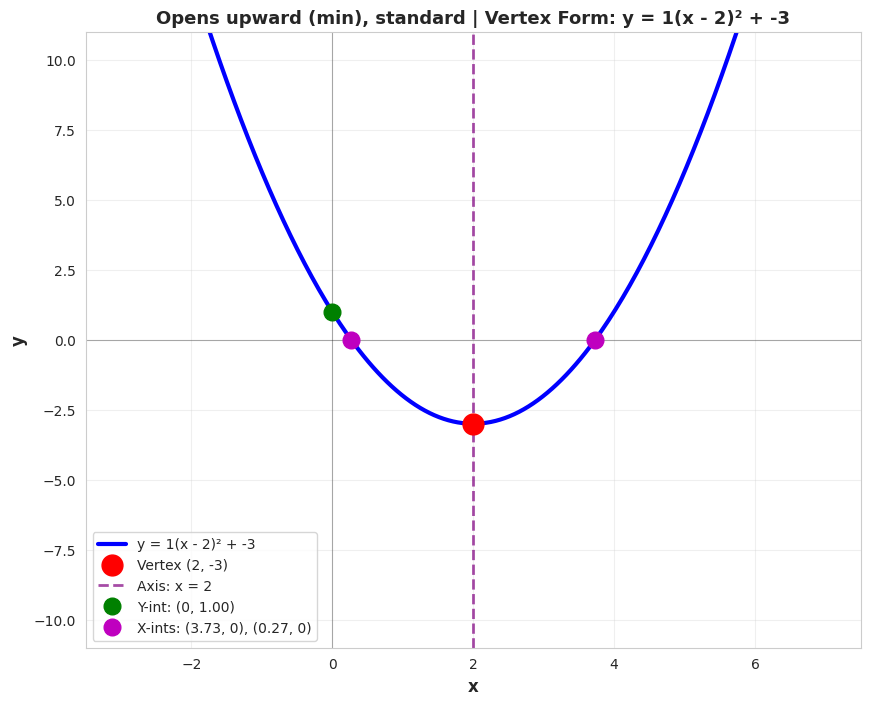


Example 2: Opens downward, vertex at (-1, 4)


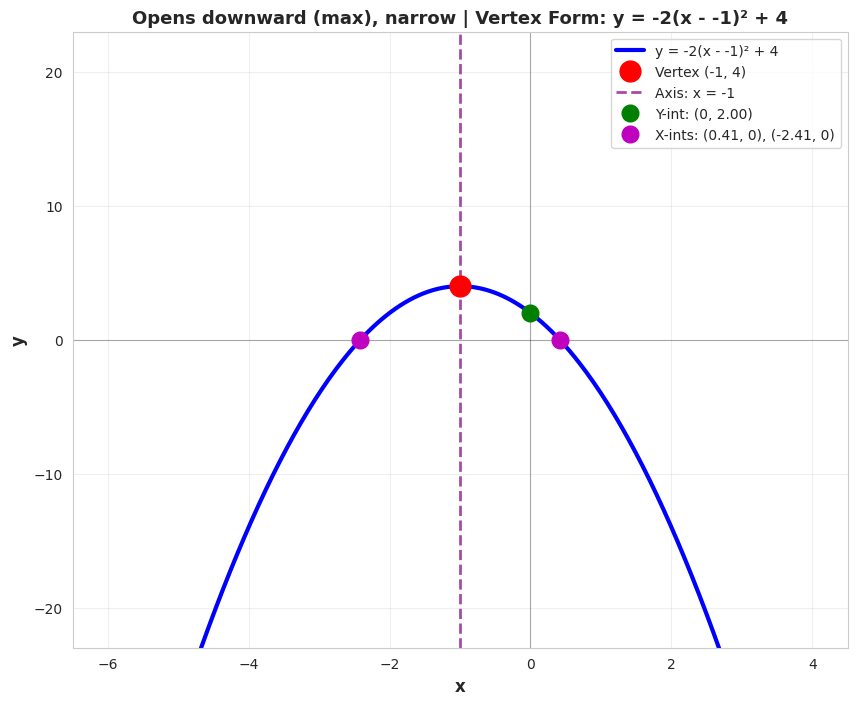

In [36]:
# Vertex Form and Graphing - Function and Examples

print("=" * 70)
print("VERTEX FORM AND GRAPHING")
print("=" * 70)

def graph_parabola_features(a, h, k):
    """Graph parabola with all key features marked"""
    x = np.linspace(h - 5, h + 5, 300)
    y = a * (x - h)**2 + k
    
    # Find x-intercepts if they exist
    discriminant_vertex = -k / a if a != 0 else 0
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot parabola
    ax.plot(x, y, 'b-', linewidth=3, label=f'y = {a}(x - {h})² + {k}')
    
    # Mark vertex
    ax.plot(h, k, 'ro', markersize=15, label=f'Vertex ({h}, {k})', zorder=5)
    
    # Axis of symmetry
    ax.axvline(x=h, color='purple', linestyle='--', linewidth=2, 
              label=f'Axis: x = {h}', alpha=0.7)
    
    # Y-intercept
    y_intercept = a * (0 - h)**2 + k
    ax.plot(0, y_intercept, 'go', markersize=12, 
           label=f'Y-int: (0, {y_intercept:.2f})', zorder=5)
    
    # X-intercepts (if real)
    if discriminant_vertex >= 0:
        sqrt_term = np.sqrt(discriminant_vertex)
        x1 = h + sqrt_term
        x2 = h - sqrt_term
        ax.plot([x1, x2], [0, 0], 'mo', markersize=12,
               label=f'X-ints: ({x1:.2f}, 0), ({x2:.2f}, 0)', zorder=5)
    
    # Reference lines
    ax.axhline(y=0, color='k', linewidth=0.8, linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linewidth=0.8, linestyle='-', alpha=0.3)
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x', fontsize=12, fontweight='bold')
    ax.set_ylabel('y', fontsize=12, fontweight='bold')
    
    direction = "upward (min)" if a > 0 else "downward (max)"
    width = "narrow" if abs(a) > 1 else "wide" if abs(a) < 1 else "standard"
    ax.set_title(f'Opens {direction}, {width} | Vertex Form: y = {a}(x - {h})² + {k}',
                fontsize=13, fontweight='bold')
    ax.legend(fontsize=10, loc='best')
    
    y_range = max(abs(y.max()), abs(y.min()))
    ax.set_ylim(-y_range*0.5, y_range*0.5)
    
    return fig

# Example parabolas
print("\nExample 1: Opens upward, vertex at (2, -3)")
fig1 = graph_parabola_features(1, 2, -3)
plt.show()

print("\nExample 2: Opens downward, vertex at (-1, 4)")
fig2 = graph_parabola_features(-2, -1, 4)
plt.show()

# Applications in Optimization - Revenue Maximization

print("=" * 70)
print("OPTIMIZATION WITH QUADRATIC FUNCTIONS")
print("=" * 70)

# Example 1: Revenue Maximization
print("\n" + "=" * 70)
print("EXAMPLE 1: REVENUE MAXIMIZATION")
print("=" * 70)

# A company sells widgets. Price-demand relationship: p = 100 - 2x
# where x = thousands of units sold, p = price per unit
# Revenue R(x) = x × p(x) = x(100 - 2x) = 100x - 2x²

print("\nBusiness Problem:")
print("  Price-demand: p = 100 - 2x")
print("  Revenue: R(x) = x × p(x) = x(100 - 2x) = 100x - 2x²")
print("\nFind: Quantity that maximizes revenue")

# R(x) = -2x² + 100x + 0
a, b, c = -2, 100, 0

# Optimal quantity
x_opt = -b / (2*a)
R_max = a * x_opt**2 + b * x_opt + c
p_opt = 100 - 2 * x_opt

print(f"\nSolution:")
print(f"  Optimal quantity: x = -{b}/(2×{a}) = {x_opt:.2f} thousand units")
print(f"  Optimal price: p = 100 - 2({x_opt}) = ${p_opt:.2f}")
print(f"  Maximum revenue: R = ${R_max:.2f} thousand")

In [37]:
# Parabolic Trajectories - Projectile Motion

print("=" * 70)
print("PARABOLIC TRAJECTORIES - PROJECTILE MOTION")
print("=" * 70)

def simulate_projectile(v0, theta_deg, h0=0, g=9.8):
    """
    Simulate projectile motion
    v0: initial velocity (m/s)
    theta_deg: launch angle (degrees)
    h0: initial height (m)
    g: gravity (m/s²)
    """
    theta = np.radians(theta_deg)
    
    # Calculate trajectory properties
    t_flight = (v0 * np.sin(theta) + np.sqrt((v0 * np.sin(theta))**2 + 2*g*h0)) / g
    h_max = h0 + (v0**2 * np.sin(theta)**2) / (2*g)
    range_x = v0**2 * np.sin(2*theta) / g + v0 * np.cos(theta) * \
              np.sqrt(2*(h0 + v0**2*np.sin(theta)**2/(2*g)) / g)
    
    # Generate trajectory points
    t = np.linspace(0, t_flight, 300)
    x = v0 * np.cos(theta) * t
    y = h0 + v0 * np.sin(theta) * t - 0.5 * g * t**2
    
    return x, y, h_max, range_x, t_flight

# Example: Ball thrown at 45° with velocity 20 m/s
print("\nExample: Ball thrown at 45° with velocity 20 m/s")
v0 = 20  # m/s
theta = 45  # degrees
h0 = 0  # ground level

x, y, h_max, range_x, t_flight = simulate_projectile(v0, theta, h0)

print(f"\nTrajectory Properties:")
print(f"  Initial velocity: {v0} m/s")
print(f"  Launch angle: {theta}°")
print(f"  Maximum height: {h_max:.2f} m")
print(f"  Range: {range_x:.2f} m")
print(f"  Time of flight: {t_flight:.2f} s")

PARABOLIC TRAJECTORIES - PROJECTILE MOTION

Example: Ball thrown at 45° with velocity 20 m/s

Trajectory Properties:
  Initial velocity: 20 m/s
  Launch angle: 45°
  Maximum height: 10.20 m
  Range: 61.22 m
  Time of flight: 2.89 s


In [38]:
print("="*70)
print("PRACTICE PROBLEMS - SOLUTIONS")
print("="*70)

# PROBLEM 1: Quadratic Roots and Properties
print("\n" + "="*70)
print("PROBLEM 1: QUADRATIC ROOTS AND PROPERTIES")
print("="*70)

print("\nGiven: f(x) = 2x² - 8x + 6")
a, b, c = 2, -8, 6

# 1. Roots using quadratic formula
print("\n1. Roots using quadratic formula:")
discriminant = b**2 - 4*a*c
print(f"   Δ = b² - 4ac = (-8)² - 4(2)(6) = {discriminant}")
root1 = (-b + np.sqrt(discriminant)) / (2*a)
root2 = (-b - np.sqrt(discriminant)) / (2*a)
print(f"   x₁ = (8 + √{discriminant}) / 4 = {root1}")
print(f"   x₂ = (8 - √{discriminant}) / 4 = {root2}")

# 2. Vertex by completing the square
print("\n2. Vertex using completing the square:")
h = -b / (2*a)
k = c - (b**2) / (4*a)
print(f"   2(x² - 4x) + 6")
print(f"   2(x² - 4x + 4 - 4) + 6")
print(f"   2(x - 2)² - 8 + 6")
print(f"   2(x - 2)² - 2")
print(f"   Vertex: ({h}, {k})")

# 3. Y-intercept and axis
print("\n3. Y-intercept and axis of symmetry:")
y_int = c
print(f"   Y-intercept: f(0) = {y_int}")
print(f"   Axis of symmetry: x = {h}")

# 4. Graph
print("\n4. Graphing (see visualization below)")

# 5. Verify properties
print("\n5. Verification of root properties:")
print(f"   Sum of roots: {root1} + {root2} = {root1 + root2}")
print(f"   Expected (-b/a): -({b})/{a} = {-b/a}")
print(f"   ✓ Match: {np.isclose(root1 + root2, -b/a)}")
print(f"\n   Product of roots: {root1} × {root2} = {root1 * root2}")
print(f"   Expected (c/a): {c}/{a} = {c/a}")
print(f"   ✓ Match: {np.isclose(root1 * root2, c/a)}")

PRACTICE PROBLEMS - SOLUTIONS

PROBLEM 1: QUADRATIC ROOTS AND PROPERTIES

Given: f(x) = 2x² - 8x + 6

1. Roots using quadratic formula:
   Δ = b² - 4ac = (-8)² - 4(2)(6) = 16
   x₁ = (8 + √16) / 4 = 3.0
   x₂ = (8 - √16) / 4 = 1.0

2. Vertex using completing the square:
   2(x² - 4x) + 6
   2(x² - 4x + 4 - 4) + 6
   2(x - 2)² - 8 + 6
   2(x - 2)² - 2
   Vertex: (2.0, -2.0)

3. Y-intercept and axis of symmetry:
   Y-intercept: f(0) = 6
   Axis of symmetry: x = 2.0

4. Graphing (see visualization below)

5. Verification of root properties:
   Sum of roots: 3.0 + 1.0 = 4.0
   Expected (-b/a): -(-8)/2 = 4.0
   ✓ Match: True

   Product of roots: 3.0 × 1.0 = 3.0
   Expected (c/a): 6/2 = 3.0
   ✓ Match: True


# Discriminant Visualization - Three Cases

# Visualization: Effect of Discriminant
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x = np.linspace(-5, 7, 1000)

# Plot 1: Δ > 0 (Two real roots)
ax1 = axes[0]
y1 = x**2 - 5*x + 6
ax1.plot(x, y1, 'b-', linewidth=2.5, label='y = x² - 5x + 6')
ax1.axhline(y=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
# Mark roots
ax1.plot([2, 3], [0, 0], 'ro', markersize=12, label='Roots: x = 2, 3')
ax1.fill_between(x, 0, y1, where=(y1 >= 0), alpha=0.2, color='blue')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Δ = 1 > 0\nTwo Real Roots', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(-2, 8)

# Plot 2: Δ = 0 (One repeated root)
ax2 = axes[1]
y2 = x**2 - 4*x + 4
ax2.plot(x, y2, 'g-', linewidth=2.5, label='y = x² - 4x + 4')
ax2.axhline(y=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
# Mark vertex (touches x-axis)
ax2.plot([2], [0], 'ro', markersize=12, label='Root: x = 2 (repeated)')
ax2.fill_between(x, 0, y2, where=(y2 >= 0), alpha=0.2, color='green')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Δ = 0\nOne Repeated Root', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(-2, 8)

# Plot 3: Δ < 0 (No real roots)
ax3 = axes[2]
y3 = x**2 + 2*x + 5
ax3.plot(x, y3, 'r-', linewidth=2.5, label='y = x² + 2x + 5')
ax3.axhline(y=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
ax3.axvline(x=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
# Mark vertex (minimum point, above x-axis)
ax3.plot([-1], [4], 'go', markersize=12, label='Vertex (no x-intercept)')
ax3.fill_between(x, 0, y3, where=(y3 >= 0), alpha=0.2, color='red')
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=12, fontweight='bold')
ax3.set_ylabel('y', fontsize=12, fontweight='bold')
ax3.set_title('Δ = -16 < 0\nComplex Roots', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.set_ylim(-2, 15)

plt.tight_layout()
plt.show()

In [39]:
# Root Properties Verification

print("\n" + "=" * 70)
print("ROOT PROPERTIES VERIFICATION")
print("=" * 70)

a, b, c = 1, -5, 6
r1, r2, _ = solve_quadratic(a, b, c, show_steps=False)

print(f"\nFor equation: {a}x² + {b}x + {c} = 0")
print(f"Roots: r₁ = {r1:.4f}, r₂ = {r2:.4f}")
print(f"\nSum of roots: r₁ + r₂ = {r1 + r2:.4f}")
print(f"Expected: -b/a = -{b}/{a} = {-b/a:.4f}")
print(f"✓ Match: {np.isclose(r1 + r2, -b/a)}")

print(f"\nProduct of roots: r₁ × r₂ = {r1 * r2:.4f}")
print(f"Expected: c/a = {c}/{a} = {c/a:.4f}")
print(f"✓ Match: {np.isclose(r1 * r2, c/a)}")


ROOT PROPERTIES VERIFICATION

For equation: 1x² + -5x + 6 = 0
Roots: r₁ = 3.0000, r₂ = 2.0000

Sum of roots: r₁ + r₂ = 5.0000
Expected: -b/a = --5/1 = 5.0000
✓ Match: True

Product of roots: r₁ × r₂ = 6.0000
Expected: c/a = 6/1 = 6.0000
✓ Match: True


In [40]:
# Data Science Application - MSE Setup

print("\n" + "=" * 70)
print("DATA SCIENCE: QUADRATIC LOSS FUNCTION (MSE)")
print("=" * 70)

# Generate synthetic data
np.random.seed(42)
true_value = 5
predictions = np.linspace(0, 10, 100)
mse = (predictions - true_value)**2  # Quadratic loss

# Find minimum (should be at prediction = true_value)
min_idx = np.argmin(mse)
optimal_pred = predictions[min_idx]

print(f"\nTrue value: {true_value}")
print(f"Optimal prediction: {optimal_pred:.2f}")
print(f"Minimum MSE: {mse[min_idx]:.4f}")


DATA SCIENCE: QUADRATIC LOSS FUNCTION (MSE)

True value: 5
Optimal prediction: 4.95
Minimum MSE: 0.0026


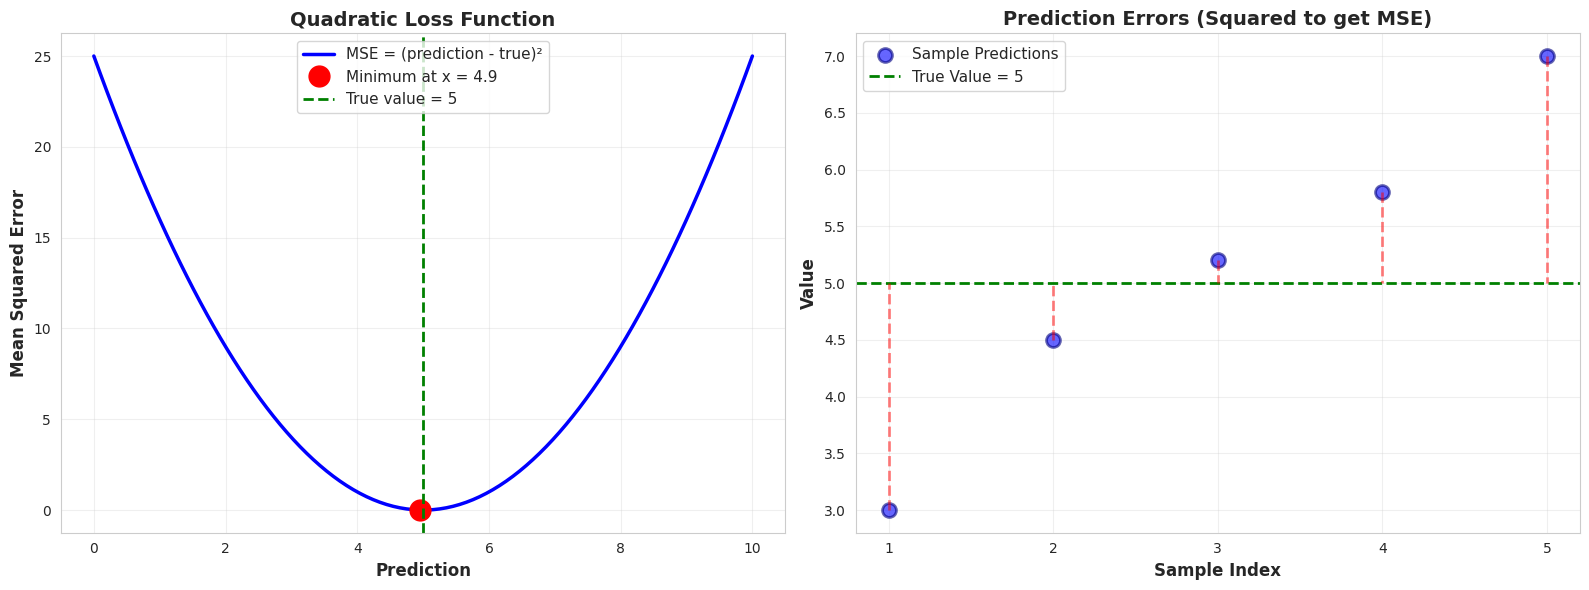

In [41]:
# MSE Visualization - Quadratic Loss Function

# Visualize MSE as quadratic function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: MSE curve
ax1.plot(predictions, mse, 'b-', linewidth=2.5, label='MSE = (prediction - true)²')
ax1.plot(optimal_pred, mse[min_idx], 'ro', markersize=15, 
         label=f'Minimum at x = {optimal_pred:.1f}')
ax1.axvline(x=true_value, color='green', linestyle='--', linewidth=2, 
           label=f'True value = {true_value}')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Prediction', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
ax1.set_title('Quadratic Loss Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Sample predictions with errors
ax2.scatter([1, 2, 3, 4, 5], [3, 4.5, 5.2, 5.8, 7], 
           s=100, c='blue', alpha=0.6, edgecolors='navy', linewidth=2,
           label='Sample Predictions')
ax2.axhline(y=true_value, color='green', linewidth=2, linestyle='--',
           label=f'True Value = {true_value}')

# Draw error bars
sample_preds = np.array([3, 4.5, 5.2, 5.8, 7])
for i, pred in enumerate(sample_preds):
    error = abs(pred - true_value)
    ax2.plot([i+1, i+1], [pred, true_value], 'r--', linewidth=2, alpha=0.5)
    
ax2.set_xlabel('Sample Index', fontsize=12, fontweight='bold')
ax2.set_ylabel('Value', fontsize=12, fontweight='bold')
ax2.set_title('Prediction Errors (Squared to get MSE)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_xticks([1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()

In [42]:
# MSE Summary and Key Insight

sample_preds = np.array([3, 4.5, 5.2, 5.8, 7])
sample_mse = np.mean((sample_preds - true_value)**2)
print(f"\nSample MSE: {sample_mse:.4f}")
print(f"Individual errors²: {[(p - true_value)**2 for p in sample_preds]}")

print("\n🎯 Key Insight: MSE is a quadratic function of predictions.")
print("   Minimizing MSE finds the optimal prediction (parabola vertex).")


Sample MSE: 1.7860
Individual errors²: [np.float64(4.0), np.float64(0.25), np.float64(0.04000000000000007), np.float64(0.6399999999999997), np.float64(4.0)]

🎯 Key Insight: MSE is a quadratic function of predictions.
   Minimizing MSE finds the optimal prediction (parabola vertex).


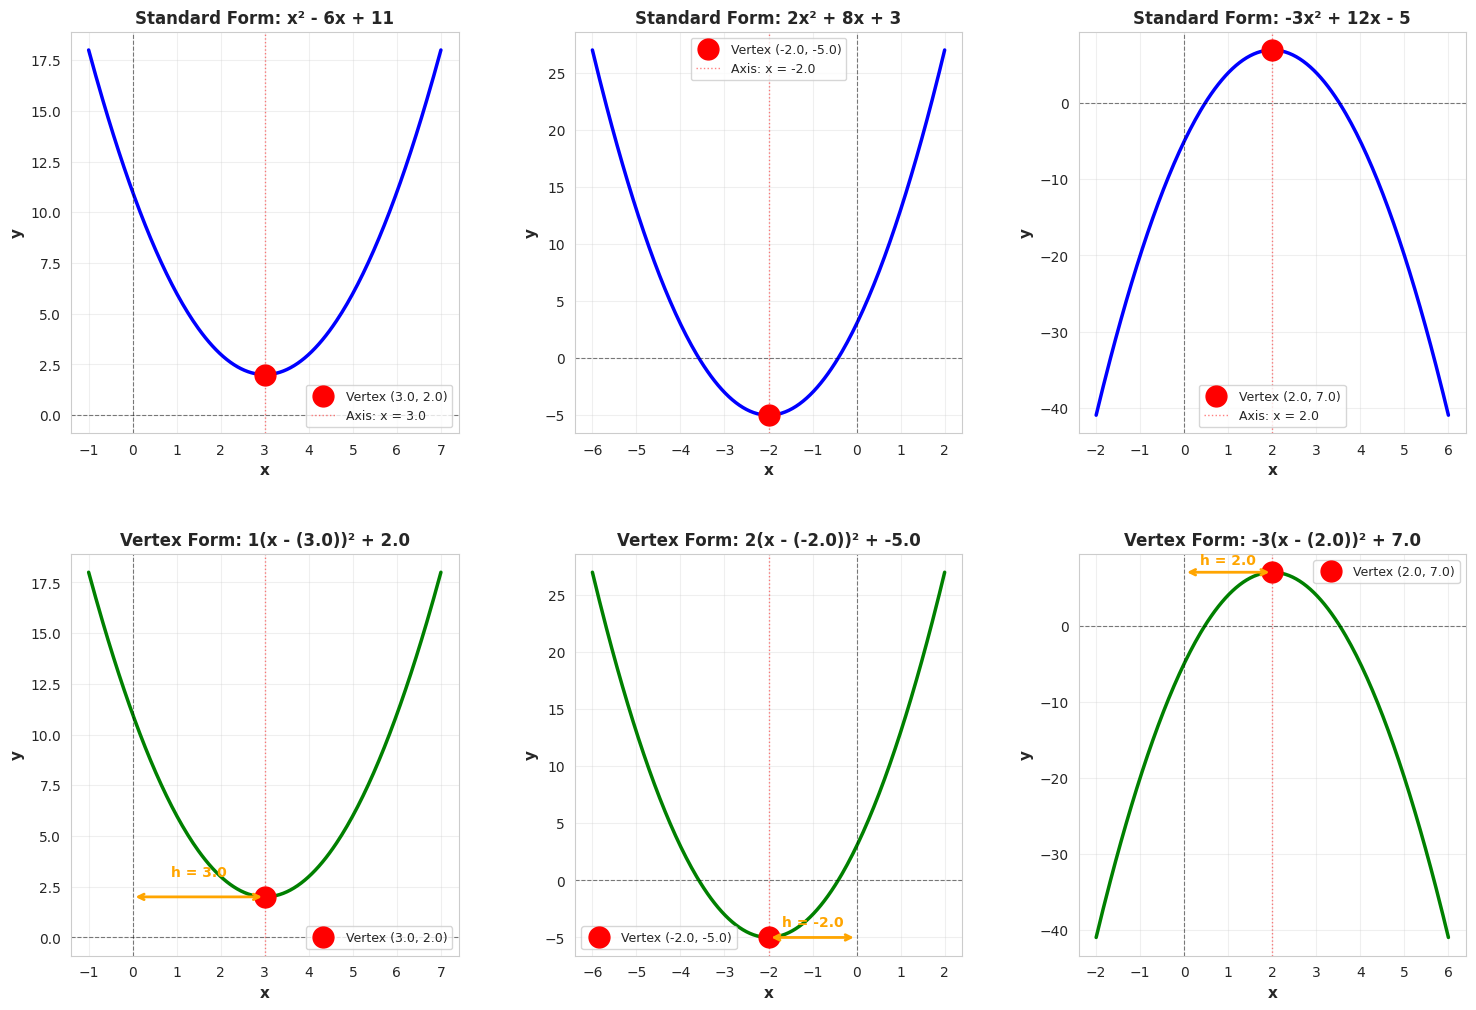

In [43]:
# Completing the Square - Transformation Visualization

# Visualization: Transformation from standard to vertex form
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

examples = [
    (1, -6, 11, a1, h1, k1, "x² - 6x + 11"),
    (2, 8, 3, a2, h2, k2, "2x² + 8x + 3"),
    (-3, 12, -5, a3, h3, k3, "-3x² + 12x - 5")
]

for idx, (a, b, c, a_v, h_v, k_v, title) in enumerate(examples):
    # Top row: Original form
    ax_top = fig.add_subplot(gs[0, idx])
    x = np.linspace(h_v - 4, h_v + 4, 200)
    y = a*x**2 + b*x + c
    
    ax_top.plot(x, y, 'b-', linewidth=2.5)
    ax_top.plot(h_v, k_v, 'ro', markersize=15, label=f'Vertex ({h_v:.1f}, {k_v:.1f})')
    ax_top.axhline(y=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
    ax_top.axvline(x=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
    ax_top.axvline(x=h_v, color='r', linewidth=1, linestyle=':', alpha=0.5,
                  label=f'Axis: x = {h_v:.1f}')
    ax_top.grid(True, alpha=0.3)
    ax_top.set_xlabel('x', fontsize=11, fontweight='bold')
    ax_top.set_ylabel('y', fontsize=11, fontweight='bold')
    ax_top.set_title(f'Standard Form: {title}', fontsize=12, fontweight='bold')
    ax_top.legend(fontsize=9)
    
    # Bottom row: Vertex form representation
    ax_bottom = fig.add_subplot(gs[1, idx])
    y_vertex = a_v * (x - h_v)**2 + k_v
    
    ax_bottom.plot(x, y_vertex, 'g-', linewidth=2.5)
    ax_bottom.plot(h_v, k_v, 'ro', markersize=15, label=f'Vertex ({h_v:.1f}, {k_v:.1f})')
    ax_bottom.axhline(y=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
    ax_bottom.axvline(x=0, color='k', linewidth=0.8, linestyle='--', alpha=0.5)
    ax_bottom.axvline(x=h_v, color='r', linewidth=1, linestyle=':', alpha=0.5)
    
    # Show transformation visually
    ax_bottom.annotate('', xy=(h_v, k_v), xytext=(0, k_v),
                      arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
    ax_bottom.text(h_v/2, k_v + 1, f'h = {h_v:.1f}', fontsize=10, 
                  ha='center', color='orange', fontweight='bold')
    
    ax_bottom.grid(True, alpha=0.3)
    ax_bottom.set_xlabel('x', fontsize=11, fontweight='bold')
    ax_bottom.set_ylabel('y', fontsize=11, fontweight='bold')
    vertex_form = f'{a_v}(x - ({h_v:.1f}))² + {k_v:.1f}'
    ax_bottom.set_title(f'Vertex Form: {vertex_form}', fontsize=12, fontweight='bold')
    ax_bottom.legend(fontsize=9)

plt.show()

# Solving Equations by Completing the Square

print("\n" + "=" * 70)
print("SOLVING EQUATIONS BY COMPLETING THE SQUARE")
print("=" * 70)

def solve_by_completing_square(a, b, c):
    """Solve ax² + bx + c = 0 by completing the square"""
    print(f"\nSolve: {a}x² + {b}x + {c} = 0")
    
    # Convert to vertex form
    h = -b / (2*a)
    k = c - (b**2) / (4*a)
    
    print(f"\nStep 1: Complete the square")
    print(f"  {a}(x - ({h}))² + {k} = 0")
    
    print(f"\nStep 2: Isolate the square")
    print(f"  {a}(x - ({h}))² = {-k}")
    print(f"  (x - ({h}))² = {-k/a}")
    
    if -k/a < 0:
        print(f"\nΔ Since {-k/a} < 0, no real solutions (complex roots)")
        sqrt_term = np.sqrt(abs(-k/a))
        print(f"  x = {h} ± {sqrt_term:.4f}i")
        return None
    elif -k/a == 0:
        print(f"\nStep 3: Take square root")
        print(f"  x - ({h}) = 0")
        print(f"  x = {h}")
        return [h]
    else:
        sqrt_term = np.sqrt(-k/a)
        print(f"\nStep 3: Take square root of both sides")
        print(f"  x - ({h}) = ±√{-k/a}")
        print(f"  x - ({h}) = ±{sqrt_term:.4f}")
        
        r1 = h + sqrt_term
        r2 = h - sqrt_term
        print(f"\nSolutions:")
        print(f"  x₁ = {h} + {sqrt_term:.4f} = {r1:.4f}")
        print(f"  x₂ = {h} - {sqrt_term:.4f} = {r2:.4f}")
        return [r1, r2]

solve_by_completing_square(1, -6, 8)
solve_by_completing_square(2, 4, -6)

In [44]:
# Gaussian Distribution - Setup

print("\n" + "=" * 70)
print("DATA SCIENCE: GAUSSIAN DISTRIBUTION (COMPLETED SQUARE FORM)")
print("=" * 70)

# Normal distribution uses completed square in exponent
mu = 5  # mean
sigma = 1.5  # standard deviation

x = np.linspace(0, 10, 200)

# Gaussian PDF: (1/√(2πσ²)) * exp(-(x-μ)²/(2σ²))
# The exponent is a completed square!
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)


DATA SCIENCE: GAUSSIAN DISTRIBUTION (COMPLETED SQUARE FORM)


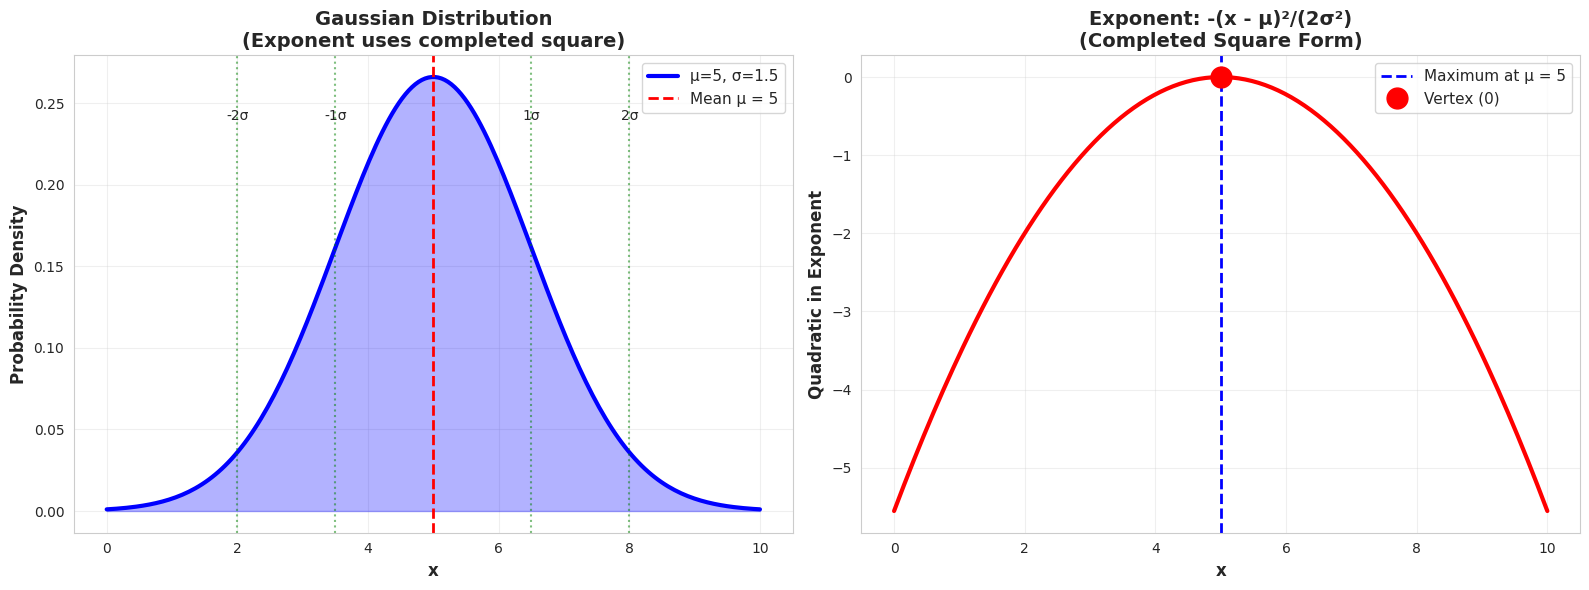


🎯 Key Insight: Gaussian uses completed square (x - μ)²
   This centers the distribution at mean μ = 5
   The vertex of the quadratic in exponent is at the mean


In [45]:
# Gaussian Distribution - Visualization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Gaussian distribution
ax1.plot(x, pdf, 'b-', linewidth=3, label=f'μ={mu}, σ={sigma}')
ax1.axvline(x=mu, color='r', linestyle='--', linewidth=2, label=f'Mean μ = {mu}')
ax1.fill_between(x, 0, pdf, alpha=0.3, color='blue')

# Mark standard deviations
for k in [-2, -1, 1, 2]:
    x_k = mu + k * sigma
    if 0 <= x_k <= 10:
        ax1.axvline(x=x_k, color='green', linestyle=':', alpha=0.5, linewidth=1.5)
        ax1.text(x_k, max(pdf)*0.9, f'{k}σ', fontsize=10, ha='center')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax1.set_title('Gaussian Distribution\n(Exponent uses completed square)', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: The quadratic in the exponent
quadratic_exp = -0.5 * ((x - mu) / sigma)**2
ax2.plot(x, quadratic_exp, 'r-', linewidth=3)
ax2.axvline(x=mu, color='blue', linestyle='--', linewidth=2, 
           label=f'Maximum at μ = {mu}')
ax2.plot(mu, 0, 'ro', markersize=15, label='Vertex (0)')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('Quadratic in Exponent', fontsize=12, fontweight='bold')
ax2.set_title('Exponent: -(x - μ)²/(2σ²)\n(Completed Square Form)', 
             fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Insight: Gaussian uses completed square (x - μ)²")
print(f"   This centers the distribution at mean μ = {mu}")
print(f"   The vertex of the quadratic in exponent is at the mean")

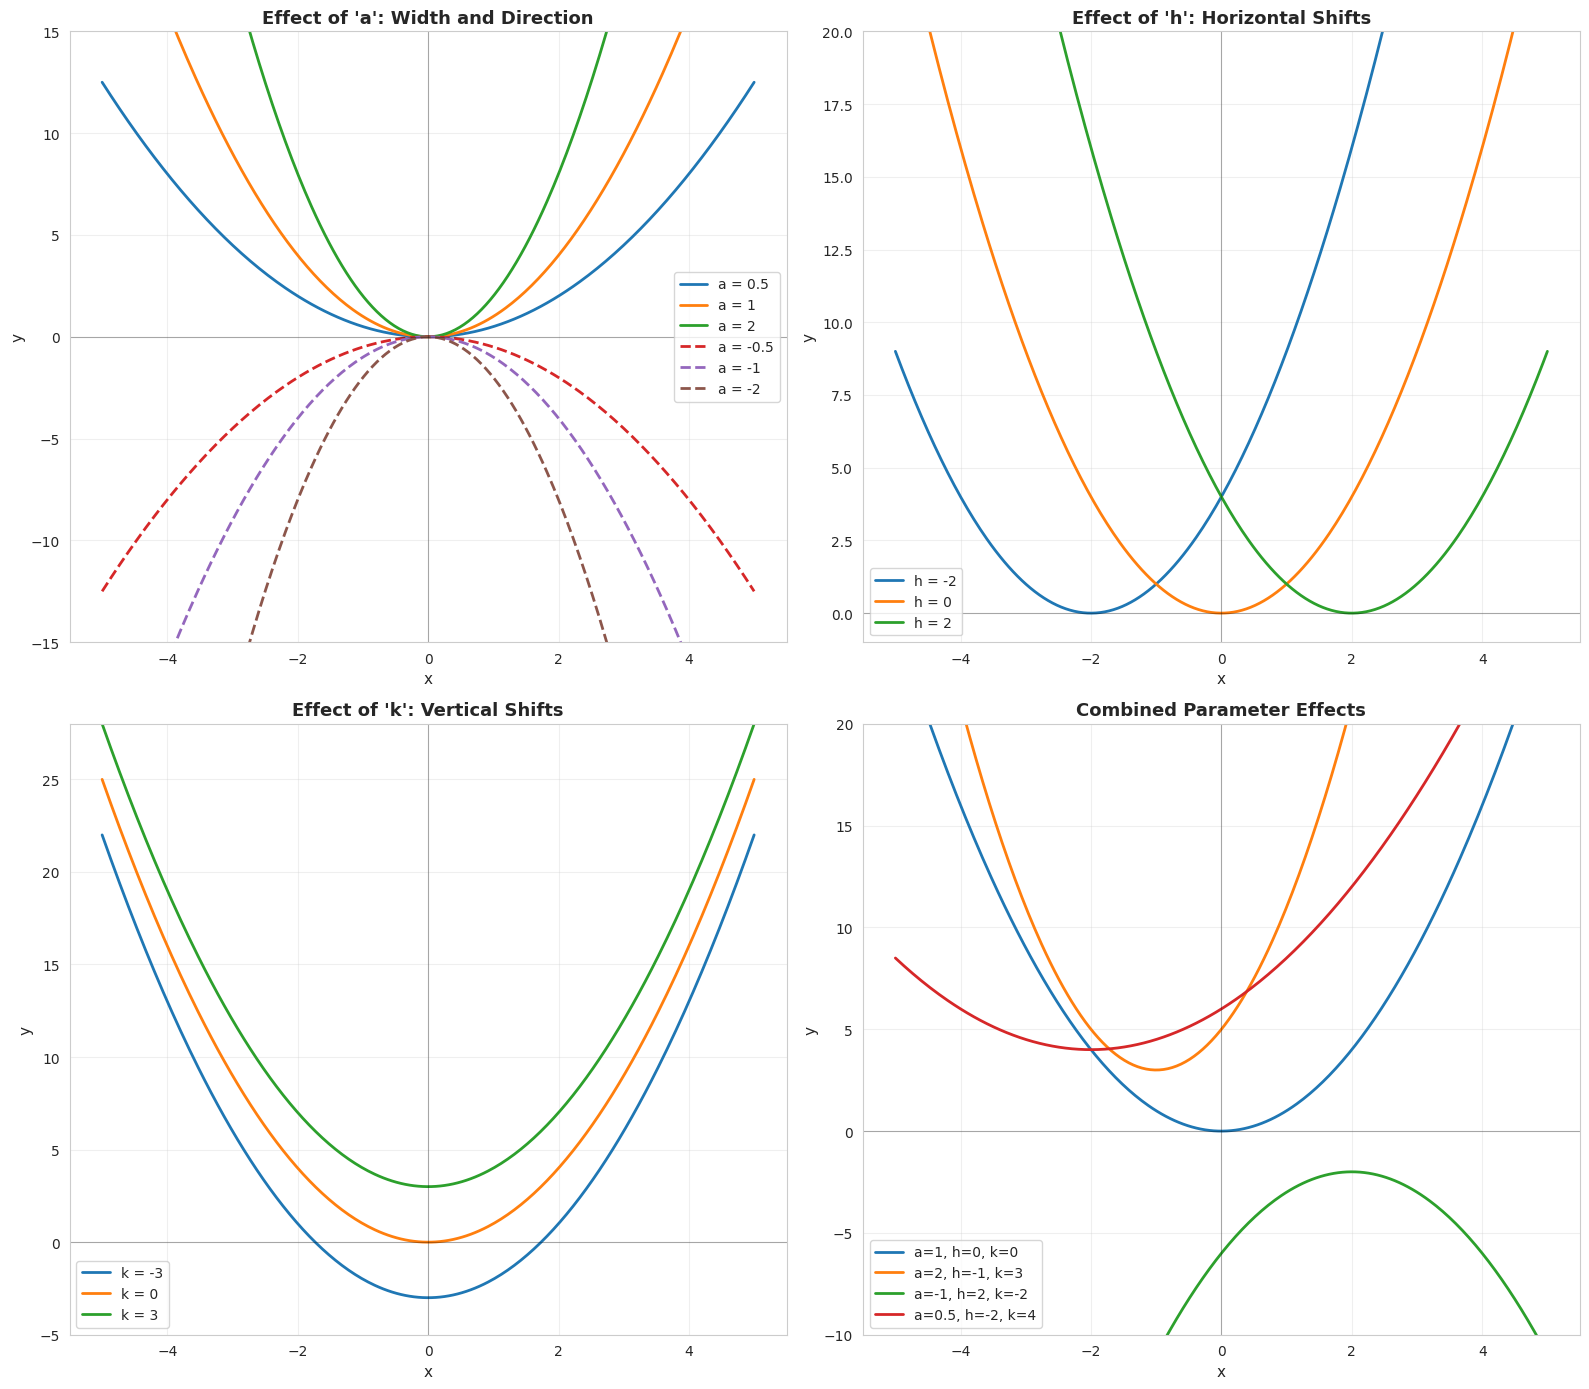


✓ Parameter effects visualized:
  • 'a' controls width and direction (positive=up, negative=down)
  • 'h' shifts horizontally (right if h>0)
  • 'k' shifts vertically (up if k>0)


In [46]:
# Parameter Effects Visualization

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Effect of 'a' parameter
x = np.linspace(-5, 5, 300)
ax = axes[0, 0]
for a_val in [0.5, 1, 2]:
    y = a_val * x**2
    ax.plot(x, y, linewidth=2, label=f'a = {a_val}')
for a_val in [-0.5, -1, -2]:
    y = a_val * x**2
    ax.plot(x, y, linewidth=2, linestyle='--', label=f'a = {a_val}')
ax.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_title("Effect of 'a': Width and Direction", fontsize=13, fontweight='bold')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.legend()
ax.set_ylim(-15, 15)

# Effect of 'h' parameter (horizontal shift)
ax = axes[0, 1]
for h_val in [-2, 0, 2]:
    y = (x - h_val)**2
    ax.plot(x, y, linewidth=2, label=f'h = {h_val}')
ax.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_title("Effect of 'h': Horizontal Shifts", fontsize=13, fontweight='bold')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.legend()
ax.set_ylim(-1, 20)

# Effect of 'k' parameter (vertical shift)
ax = axes[1, 0]
for k_val in [-3, 0, 3]:
    y = x**2 + k_val
    ax.plot(x, y, linewidth=2, label=f'k = {k_val}')
ax.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_title("Effect of 'k': Vertical Shifts", fontsize=13, fontweight='bold')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.legend()
ax.set_ylim(-5, 28)

# Combined effects
ax = axes[1, 1]
configs = [(1, 0, 0), (2, -1, 3), (-1, 2, -2), (0.5, -2, 4)]
for a, h, k in configs:
    y = a * (x - h)**2 + k
    ax.plot(x, y, linewidth=2, label=f'a={a}, h={h}, k={k}')
ax.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_title("Combined Parameter Effects", fontsize=13, fontweight='bold')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.legend()
ax.set_ylim(-10, 20)

plt.tight_layout()
plt.show()

print("\n✓ Parameter effects visualized:")
print("  • 'a' controls width and direction (positive=up, negative=down)")
print("  • 'h' shifts horizontally (right if h>0)")
print("  • 'k' shifts vertically (up if k>0)")

In [47]:
# Gradient Descent Application (Optimization)

print("\n" + "=" * 70)
print("APPLICATION: Gradient Descent on Quadratic Loss Function")
print("=" * 70)

# Define simple quadratic loss: f(x) = (x - 3)² + 1
def loss_function(x):
    return (x - 3)**2 + 1

def gradient(x):
    return 2 * (x - 3)

# Gradient descent
x_start = -2
learning_rate = 0.3
num_iterations = 15

x_history = [x_start]
loss_history = [loss_function(x_start)]

x_current = x_start
for i in range(num_iterations):
    grad = gradient(x_current)
    x_current = x_current - learning_rate * grad
    
    x_history.append(x_current)
    loss_history.append(loss_function(x_current))
    
    if i < 5 or i >= num_iterations - 2:
        print(f"Iteration {i+1:2d}: x = {x_current:7.4f}, loss = {loss_function(x_current):7.4f}, gradient = {grad:7.4f}")

print(f"\n✓ Converged from x={x_start} to x≈{x_current:.6f} (true minimum at x=3)")
print(f"✓ Final loss: {loss_function(x_current):.10f} (minimum is 1.0)")


APPLICATION: Gradient Descent on Quadratic Loss Function
Iteration  1: x =  1.0000, loss =  5.0000, gradient = -10.0000
Iteration  2: x =  2.2000, loss =  1.6400, gradient = -4.0000
Iteration  3: x =  2.6800, loss =  1.1024, gradient = -1.6000
Iteration  4: x =  2.8720, loss =  1.0164, gradient = -0.6400
Iteration  5: x =  2.9488, loss =  1.0026, gradient = -0.2560
Iteration 14: x =  3.0000, loss =  1.0000, gradient = -0.0001
Iteration 15: x =  3.0000, loss =  1.0000, gradient = -0.0000

✓ Converged from x=-2 to x≈2.999995 (true minimum at x=3)
✓ Final loss: 1.0000000000 (minimum is 1.0)


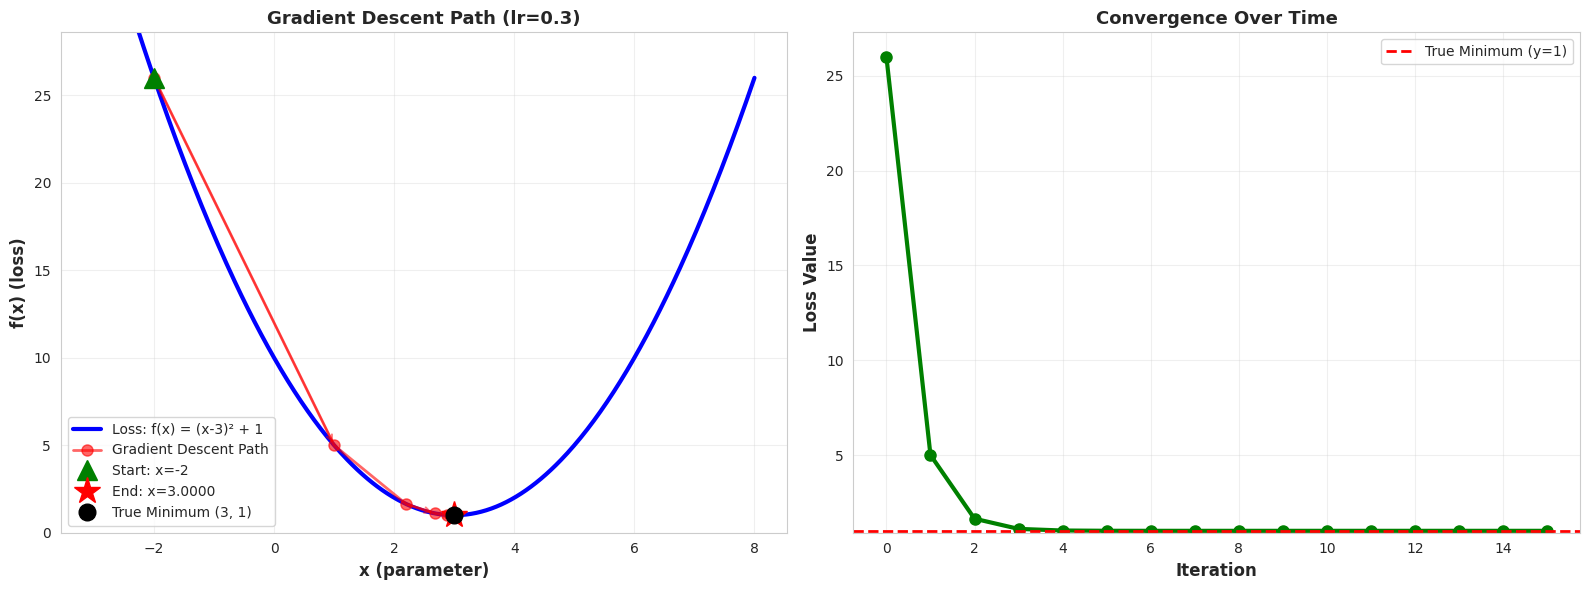

In [48]:
# Gradient Descent Visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left panel: Path on parabola
ax = axes[0]
x_plot = np.linspace(-3, 8, 400)
y_plot = loss_function(x_plot)

ax.plot(x_plot, y_plot, 'b-', linewidth=3, label='Loss: f(x) = (x-3)² + 1')
ax.plot(x_history, loss_history, 'ro-', markersize=8, linewidth=2, 
        alpha=0.6, label='Gradient Descent Path')
ax.plot(x_history[0], loss_history[0], 'g^', markersize=15, 
        label=f'Start: x={x_history[0]}', zorder=5)
ax.plot(x_history[-1], loss_history[-1], 'r*', markersize=20, 
        label=f'End: x={x_history[-1]:.4f}', zorder=5)
ax.plot(3, 1, 'ko', markersize=12, label='True Minimum (3, 1)', zorder=5)

# Add arrows to show direction
for i in range(0, len(x_history)-1, 2):
    ax.annotate('', xy=(x_history[i+1], loss_history[i+1]),
               xytext=(x_history[i], loss_history[i]),
               arrowprops=dict(arrowstyle='->', color='red', lw=1.5, alpha=0.5))

ax.grid(True, alpha=0.3)
ax.set_xlabel('x (parameter)', fontsize=12, fontweight='bold')
ax.set_ylabel('f(x) (loss)', fontsize=12, fontweight='bold')
ax.set_title(f'Gradient Descent Path (lr={learning_rate})', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.set_ylim(0, max(loss_history) * 1.1)

# Right panel: Convergence
ax = axes[1]
ax.plot(range(len(loss_history)), loss_history, 'go-', linewidth=3, markersize=8)
ax.axhline(y=1, color='r', linestyle='--', linewidth=2, label='True Minimum (y=1)')
ax.grid(True, alpha=0.3)
ax.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss Value', fontsize=12, fontweight='bold')
ax.set_title('Convergence Over Time', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.set_ylim(0.9, max(loss_history) * 1.05)

plt.tight_layout()
plt.show()

In [49]:
# Gradient Descent Summary

print("\n" + "=" * 70)
print("GRADIENT DESCENT RESULTS")
print("=" * 70)

print(f"\nStarting point:     x = {x_history[0]}")
print(f"Final point:        x = {x_history[-1]:.10f}")
print(f"True minimum:       x = 3.0")
print(f"Error:              {abs(x_history[-1] - 3):.10f}")
print(f"Total iterations:   {num_iterations}")
print(f"Learning rate:      {learning_rate}")

print("\n💡 KEY INSIGHT:")
print("   Quadratic functions are ideal for understanding optimization because:")
print("   • They have exactly one global extremum (minimum or maximum)")
print("   • The gradient points directly toward the minimum")
print("   • Convergence is predictable and fast with proper learning rate")


GRADIENT DESCENT RESULTS

Starting point:     x = -2
Final point:        x = 2.9999946313
True minimum:       x = 3.0
Error:              0.0000053687
Total iterations:   15
Learning rate:      0.3

💡 KEY INSIGHT:
   Quadratic functions are ideal for understanding optimization because:
   • They have exactly one global extremum (minimum or maximum)
   • The gradient points directly toward the minimum
   • Convergence is predictable and fast with proper learning rate


NameError: name 'x_opt' is not defined

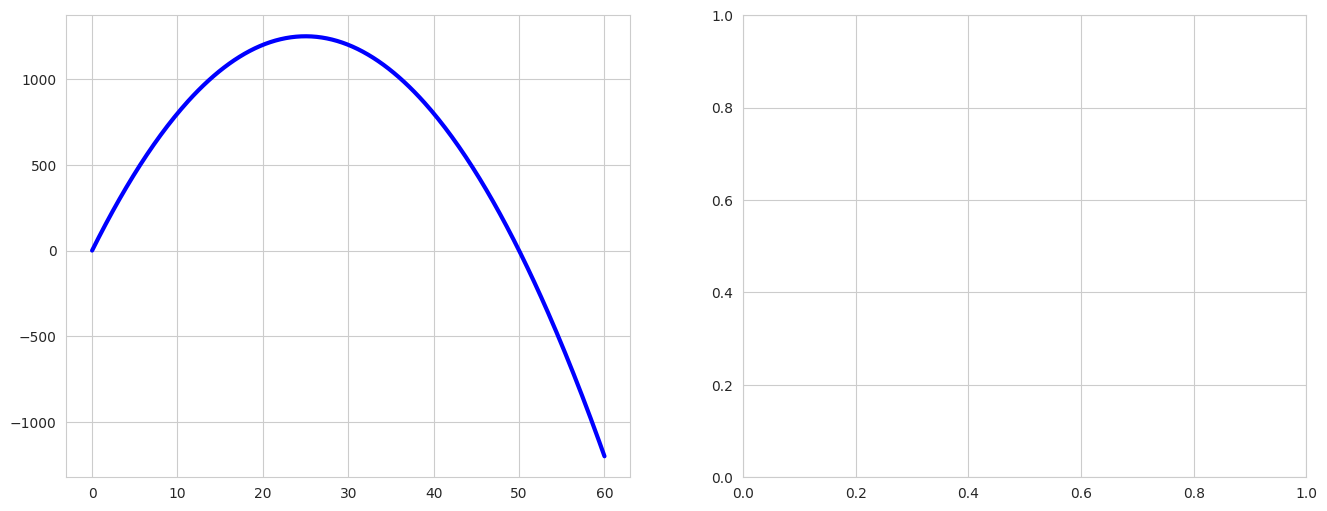

In [50]:
# Revenue Maximization Visualization

# Visualize
x = np.linspace(0, 60, 300)
revenue = -2*x**2 + 100*x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Revenue curve
ax1.plot(x, revenue, 'b-', linewidth=3, label='R(x) = 100x - 2x²')
ax1.plot(x_opt, R_max, 'ro', markersize=15,
        label=f'Max Revenue: ({x_opt:.1f}, ${R_max:.1f}k)')
ax1.axvline(x=x_opt, color='r', linestyle='--', linewidth=2, alpha=0.5)
ax1.axhline(y=R_max, color='r', linestyle='--', linewidth=2, alpha=0.5)
ax1.fill_between(x, 0, revenue, where=(revenue >= 0), alpha=0.2, color='blue')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Quantity (thousands)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue ($1000s)', fontsize=12, fontweight='bold')
ax1.set_title('Revenue Maximization', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Price vs Quantity
ax2.plot(x, 100 - 2*x, 'g-', linewidth=3, label='Price: p = 100 - 2x')
ax2.plot(x_opt, p_opt, 'ro', markersize=15,
        label=f'Optimal: ({x_opt:.1f}, ${p_opt:.1f})')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Quantity (thousands)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
ax2.set_title('Price-Demand Relationship', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
# Cost Minimization Application

# Example 2: Cost Minimization
print("\n" + "=" * 70)
print("EXAMPLE 2: COST MINIMIZATION")
print("=" * 70)

# Manufacturing cost: C(x) = 0.5x² - 10x + 200
# Find quantity that minimizes average cost
print("\nManufacturing Problem:")
print("  Total Cost: C(x) = 0.5x² - 10x + 200")
print("  Find: Quantity that minimizes cost")

a, b, c = 0.5, -10, 200
x_min_cost = -b / (2*a)
C_min = a * x_min_cost**2 + b * x_min_cost + c

print(f"\nSolution:")
print(f"  Optimal quantity: x = {x_min_cost:.2f} units")
print(f"  Minimum cost: C = ${C_min:.2f}")


FINANCE: PORTFOLIO OPTIMIZATION

Problem: Allocate wealth between two assets
  Asset 1: Expected return = 10%, Risk = 20%
  Asset 2: Expected return = 15%, Risk = 30%

✓ Computed efficient frontier for 30 portfolios
  Portfolio variance is a QUADRATIC function of weights!


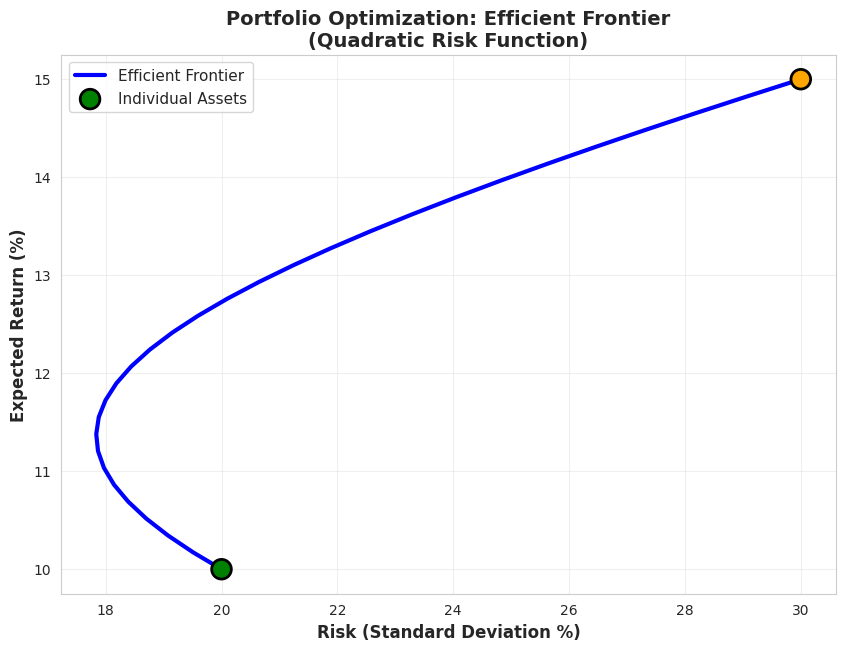


🎯 Key Insight: Many optimization problems involve quadratic
   objectives (variance, squared error, penalties).


In [ ]:
# Cost Minimization Visualization

x = np.linspace(0, 30, 300)
cost = 0.5*x**2 - 10*x + 200

plt.figure(figsize=(10, 6))
plt.plot(x, cost, 'r-', linewidth=3, label='C(x) = 0.5x² - 10x + 200')
plt.plot(x_min_cost, C_min, 'go', markersize=15,
        label=f'Min Cost: ({x_min_cost:.1f}, ${C_min:.1f})')
plt.axvline(x=x_min_cost, color='g', linestyle='--', linewidth=2, alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('Quantity', fontsize=12, fontweight='bold')
plt.ylabel('Total Cost ($)', fontsize=12, fontweight='bold')
plt.title('Cost Minimization', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

# Ridge Regression Application (L2 Regularization)

# Data Science Application: Ridge Regression
print("\n" + "=" * 70)
print("DATA SCIENCE: RIDGE REGRESSION (L2 REGULARIZATION)")
print("=" * 70)

# Generate synthetic data
np.random.seed(42)
n = 50
X = np.random.randn(n, 1) * 2
y_true = 3 * X.flatten() + 2
y = y_true + np.random.randn(n) * 1.5

print("\nGenerated synthetic dataset:")
print(f"  • {n} data points")
print(f"  • True relationship: y = 3x + 2")
print(f"  • Added noise: σ = 1.5")
print("\nRidge regression minimizes: ||y - Xβ||² + λ||β||²")
print("  • First term: Mean Squared Error (quadratic in β)")
print("  • Second term: L2 penalty (quadratic in β)")

In [ ]:
# Ridge Regression Visualization

# Ridge regression: minimize ||y - Xβ||² + λ||β||²
# This is a quadratic function in β!

lambdas = [0, 0.5, 2, 10]  # Different regularization strengths
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, lam in enumerate(lambdas):
    ax = axes[idx // 2, idx % 2]
    
    # Solve ridge regression manually
    # β = (X'X + λI)⁻¹X'y
    XtX = X.T @ X
    Xty = X.T @ y
    beta = np.linalg.inv(XtX + lam * np.eye(1)) @ Xty
    beta_val = beta.item() if beta.ndim == 1 else beta[0, 0]
    
    # Plot data and fit
    ax.scatter(X, y, alpha=0.6, s=50, edgecolors='navy', linewidth=1)
    
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = X_line @ beta
    ax.plot(X_line, y_pred, 'r-', linewidth=3,
           label=f'β = {beta_val:.3f} (λ={lam})')
    
    # Calculate loss
    y_pred_train = X @ beta
    mse = np.mean((y - y_pred_train.flatten())**2)
    penalty = lam * (beta**2).sum()
    total_loss = mse + penalty
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X', fontsize=11, fontweight='bold')
    ax.set_ylabel('y', fontsize=11, fontweight='bold')
    ax.set_title(f'λ = {lam} | Loss = {total_loss:.2f} (MSE + λβ²)',
                fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)

plt.suptitle('Ridge Regression: Quadratic Penalty Shrinks Coefficients',
            fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

PARABOLIC TRAJECTORIES - PROJECTILE MOTION

Example: Ball thrown at 45° with velocity 20 m/s

Trajectory Properties:
  Initial velocity: 20 m/s
  Launch angle: 45°
  Maximum height: 10.20 m
  Range: 61.22 m
  Time of flight: 2.89 s


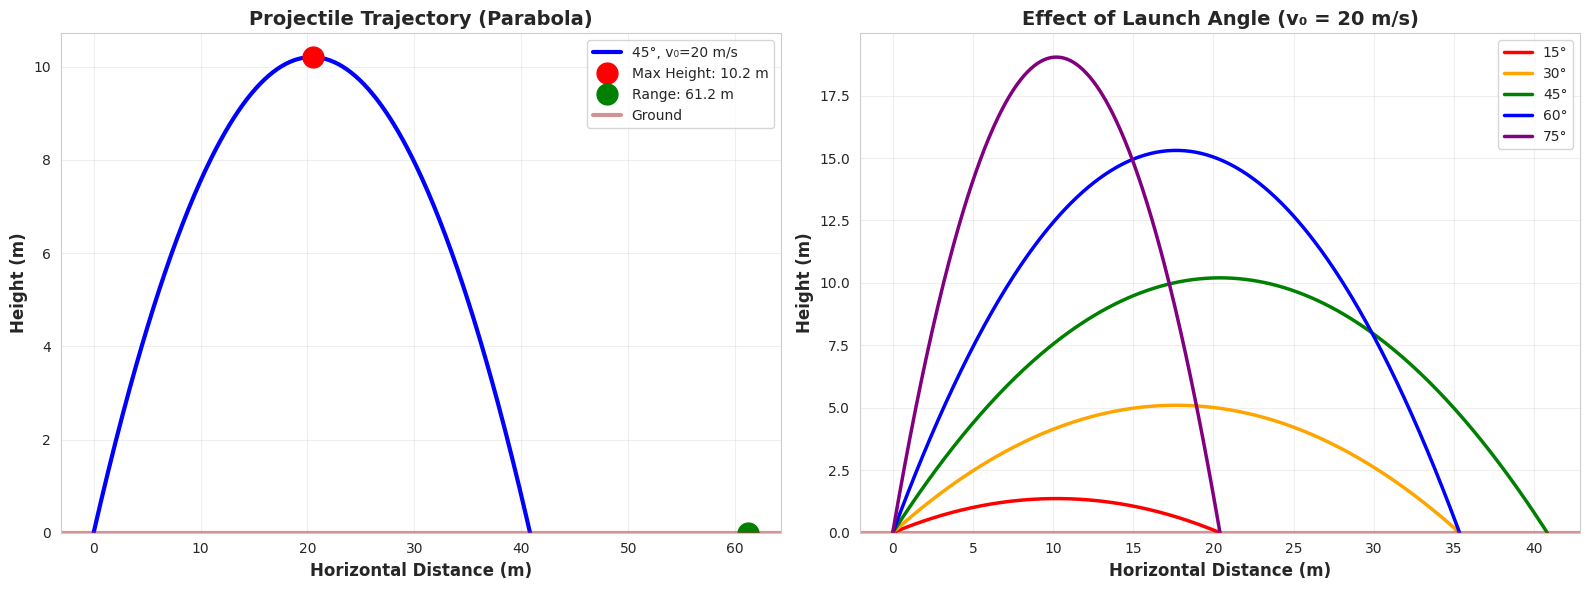

In [ ]:
# Ridge Regression Results Summary

print("\nRidge Regression Results:")
for lam in lambdas:
    XtX = X.T @ X
    Xty = X.T @ y
    beta = np.linalg.inv(XtX + lam * np.eye(1)) @ Xty
    beta_val = beta.item() if beta.ndim == 1 else beta[0, 0]
    print(f"  λ = {lam:4.1f}: β = {beta_val:6.3f}")

print("\n  As λ increases, β shrinks toward zero (regularization effect)")
print("  The ||β||² term is quadratic, creating a bowl-shaped penalty")

In [ ]:
# Portfolio Optimization Application

# Portfolio Optimization Example
print("\n" + "=" * 70)
print("FINANCE: PORTFOLIO OPTIMIZATION")
print("=" * 70)

# Two assets with returns and covariance
returns = np.array([0.10, 0.15])  # Expected returns: 10%, 15%
cov_matrix = np.array([[0.04, 0.01],
                       [0.01, 0.09]])  # Covariance matrix

print("\nProblem: Allocate wealth between two assets")
print(f"  Asset 1: Expected return = {returns[0]*100:.0f}%, Risk = {np.sqrt(cov_matrix[0,0])*100:.0f}%")
print(f"  Asset 2: Expected return = {returns[1]*100:.0f}%, Risk = {np.sqrt(cov_matrix[1,1])*100:.0f}%")

# For different target returns, find minimum risk portfolio
target_returns = np.linspace(0.10, 0.15, 30)
min_risks = []

for target in target_returns:
    # Weight in asset 1 (weight in asset 2 = 1 - w1)
    # Portfolio return: w1*r1 + (1-w1)*r2 = target
    # Solve for w1
    w1 = (target - returns[1]) / (returns[0] - returns[1])
    w2 = 1 - w1
    weights = np.array([w1, w2])
    
    # Portfolio variance (quadratic function of weights!)
    variance = weights @ cov_matrix @ weights
    min_risks.append(np.sqrt(variance))

min_risks = np.array(min_risks)

print(f"\n✓ Computed efficient frontier for {len(target_returns)} portfolios")
print("  Portfolio variance is a QUADRATIC function of weights!")


OPTIMAL LAUNCH ANGLE FOR MAXIMUM RANGE

Optimal angle: 44.2°
Maximum range: 61.20 m
Theoretical optimal: 45° (for h₀ = 0)


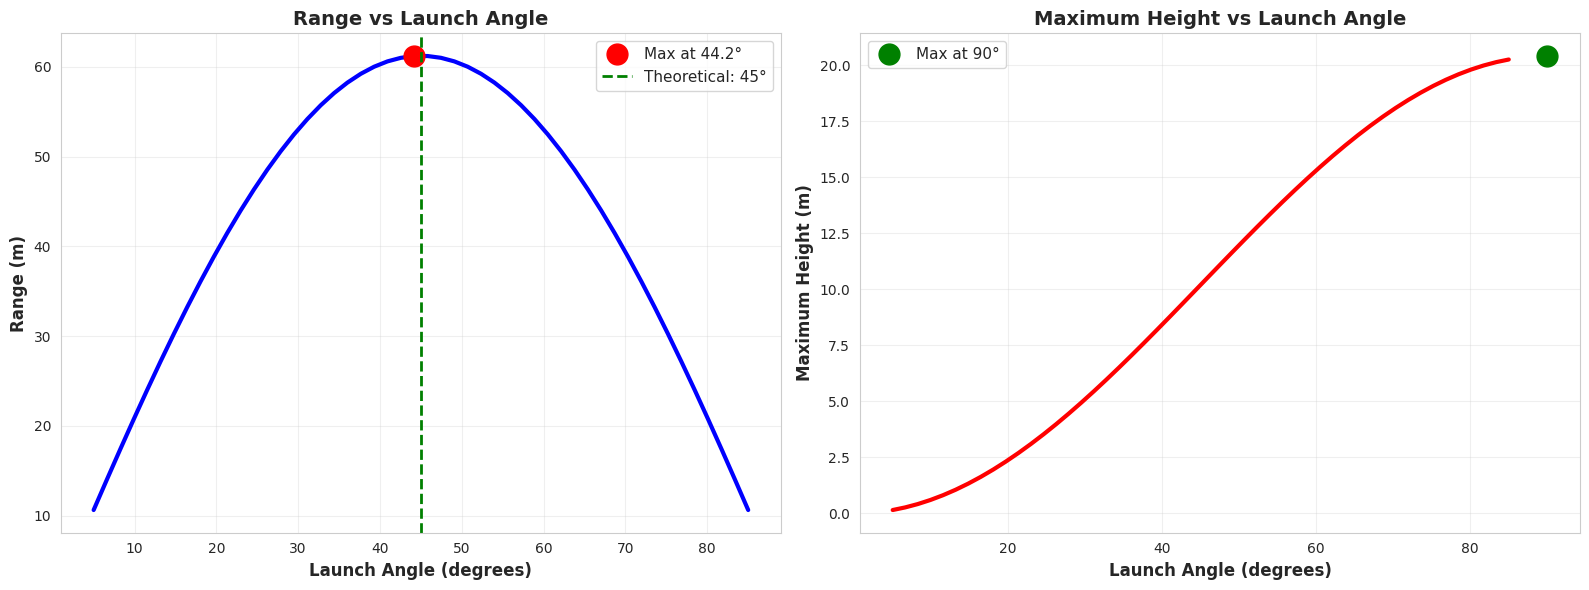

In [ ]:
# Portfolio Optimization Visualization

plt.figure(figsize=(10, 7))
plt.plot(min_risks * 100, target_returns * 100, 'b-', linewidth=3,
        label='Efficient Frontier')
plt.scatter([np.sqrt(cov_matrix[0,0])*100, np.sqrt(cov_matrix[1,1])*100],
           [returns[0]*100, returns[1]*100],
           s=200, c=['green', 'orange'], edgecolors='black', linewidth=2,
           label='Individual Assets', zorder=5)
plt.grid(True, alpha=0.3)
plt.xlabel('Risk (Standard Deviation %)', fontsize=12, fontweight='bold')
plt.ylabel('Expected Return (%)', fontsize=12, fontweight='bold')
plt.title('Portfolio Optimization: Efficient Frontier\n(Quadratic Risk Function)',
         fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

print("\n🎯 Key Insight: Many optimization problems involve quadratic")
print("   objectives (variance, squared error, penalties).")

In [ ]:
# Projectile Trajectory Visualization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Single trajectory
ax1.plot(x, y, 'b-', linewidth=3, label=f'{theta}°, v₀={v0} m/s')
ax1.plot(x[np.argmax(y)], h_max, 'ro', markersize=15,
        label=f'Max Height: {h_max:.1f} m')
ax1.plot(range_x, 0, 'go', markersize=15,
        label=f'Range: {range_x:.1f} m')
ax1.axhline(y=0, color='brown', linewidth=3, alpha=0.5, label='Ground')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Horizontal Distance (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Height (m)', fontsize=12, fontweight='bold')
ax1.set_title('Projectile Trajectory (Parabola)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(bottom=0)

# Plot 2: Multiple angles
angles = [15, 30, 45, 60, 75]
colors = ['red', 'orange', 'green', 'blue', 'purple']

for angle, color in zip(angles, colors):
    x_traj, y_traj, _, _, _ = simulate_projectile(v0, angle, h0)
    ax2.plot(x_traj, y_traj, color=color, linewidth=2.5, label=f'{angle}°')

ax2.axhline(y=0, color='brown', linewidth=3, alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Horizontal Distance (m)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Height (m)', fontsize=12, fontweight='bold')
ax2.set_title(f'Effect of Launch Angle (v₀ = {v0} m/s)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


REAL-WORLD: BASKETBALL SHOT SIMULATION

Basketball Scenario:
  Hoop height: 3.05 m
  Distance to hoop: 6.75 m
  Release height: 2.0 m

Testing 4 different shot scenarios...
  • Too slow: v₀=8 m/s, θ=50°
  • Good shot: v₀=10 m/s, θ=45°
  • Flat trajectory: v₀=12 m/s, θ=40°
  • High arc: v₀=11 m/s, θ=52°


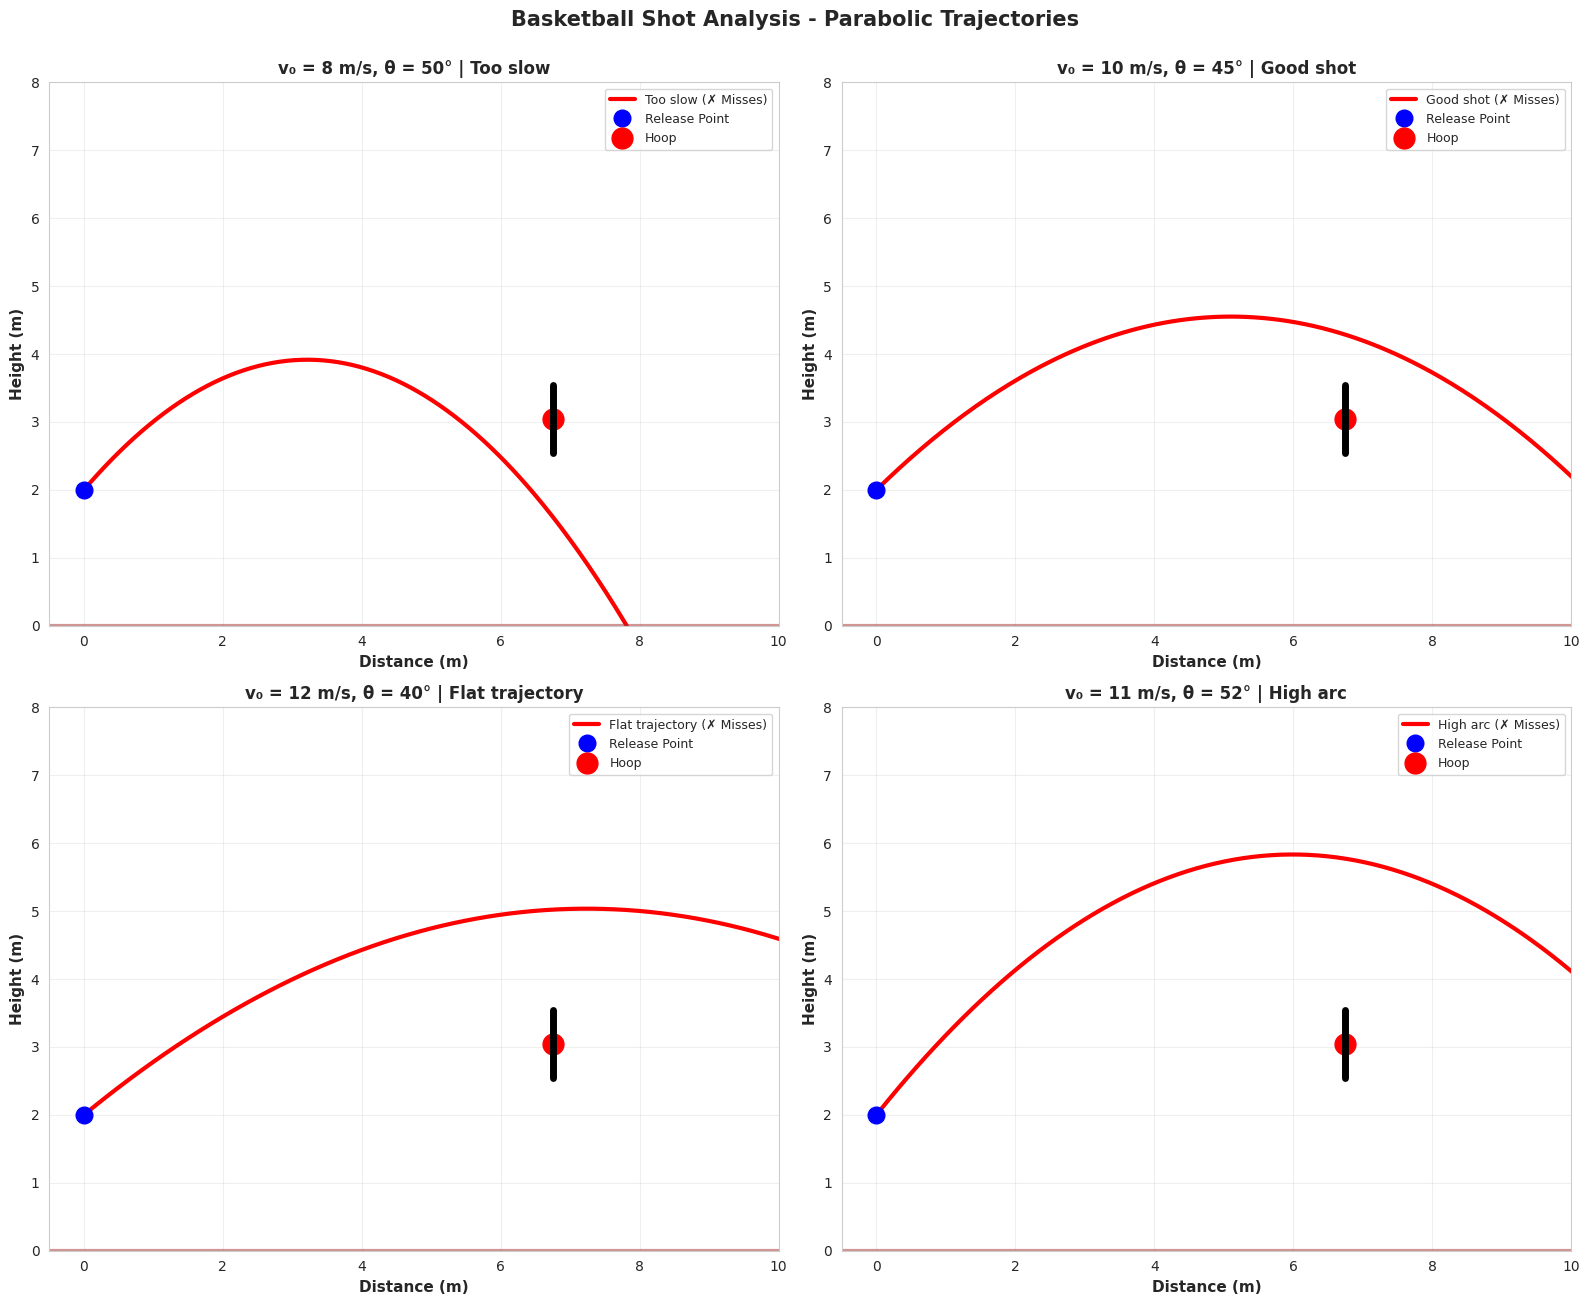


🎯 Key Insights:
   • Projectile motion follows a parabolic (quadratic) path
   • 45° angle maximizes range (for level ground)
   • Higher angles give more height but less range
   • Real applications: sports, robotics, game physics


In [ ]:
# Optimal Launch Angle Analysis

# Find optimal angle for maximum range
print("\n" + "=" * 70)
print("OPTIMAL LAUNCH ANGLE FOR MAXIMUM RANGE")
print("=" * 70)

angles_test = np.linspace(5, 85, 50)
ranges = []

for angle in angles_test:
    _, _, _, range_x, _ = simulate_projectile(v0, angle, h0)
    ranges.append(range_x)

ranges = np.array(ranges)
optimal_idx = np.argmax(ranges)
optimal_angle = angles_test[optimal_idx]
max_range = ranges[optimal_idx]

print(f"\nOptimal angle: {optimal_angle:.1f}°")
print(f"Maximum range: {max_range:.2f} m")
print(f"Theoretical optimal: 45° (for h₀ = 0)")

# Range and Height vs Angle Visualization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Range vs Angle
ax1.plot(angles_test, ranges, 'b-', linewidth=3)
ax1.plot(optimal_angle, max_range, 'ro', markersize=15,
        label=f'Max at {optimal_angle:.1f}°')
ax1.axvline(x=45, color='green', linestyle='--', linewidth=2,
           label='Theoretical: 45°')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Launch Angle (degrees)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Range (m)', fontsize=12, fontweight='bold')
ax1.set_title('Range vs Launch Angle', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Height vs Angle
heights = []
for angle in angles_test:
    _, _, h_max, _, _ = simulate_projectile(v0, angle, h0)
    heights.append(h_max)

ax2.plot(angles_test, heights, 'r-', linewidth=3)
ax2.plot(90, v0**2/(2*9.8), 'go', markersize=15,
        label=f'Max at 90°')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Launch Angle (degrees)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Maximum Height (m)', fontsize=12, fontweight='bold')
ax2.set_title('Maximum Height vs Launch Angle', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
# Basketball Shot Simulation

# Application: Basketball Shot
print("\n" + "=" * 70)
print("REAL-WORLD: BASKETBALL SHOT SIMULATION")
print("=" * 70)

# Basketball parameters
hoop_height = 3.05  # meters (10 feet)
hoop_distance = 6.75  # meters (free throw line)
release_height = 2.0  # meters (player's release point)

print(f"\nBasketball Scenario:")
print(f"  Hoop height: {hoop_height} m")
print(f"  Distance to hoop: {hoop_distance} m")
print(f"  Release height: {release_height} m")

# Try different velocities and angles
test_scenarios = [
    (8, 50, "Too slow"),
    (10, 45, "Good shot"),
    (12, 40, "Flat trajectory"),
    (11, 52, "High arc")
]

print("\nTesting 4 different shot scenarios...")
for v, angle, label in test_scenarios:
    print(f"  • {label}: v₀={v} m/s, θ={angle}°")

PRACTICE PROBLEMS - SOLUTIONS

PROBLEM 1: QUADRATIC ROOTS AND PROPERTIES

Given: f(x) = 2x² - 8x + 6

1. Roots using quadratic formula:
   Δ = b² - 4ac = (-8)² - 4(2)(6) = 16
   x₁ = (8 + √16) / 4 = 3.0
   x₂ = (8 - √16) / 4 = 1.0

2. Vertex using completing the square:
   2(x² - 4x) + 6
   2(x² - 4x + 4 - 4) + 6
   2(x - 2)² - 8 + 6
   2(x - 2)² - 2
   Vertex: (2.0, -2.0)

3. Y-intercept and axis of symmetry:
   Y-intercept: f(0) = 6
   Axis of symmetry: x = 2.0

4. Graphing (see visualization below)

5. Verification of root properties:
   Sum of roots: 3.0 + 1.0 = 4.0
   Expected (-b/a): -(-8)/2 = 4.0
   ✓ Match: True

   Product of roots: 3.0 × 1.0 = 3.0
   Expected (c/a): 6/2 = 3.0
   ✓ Match: True


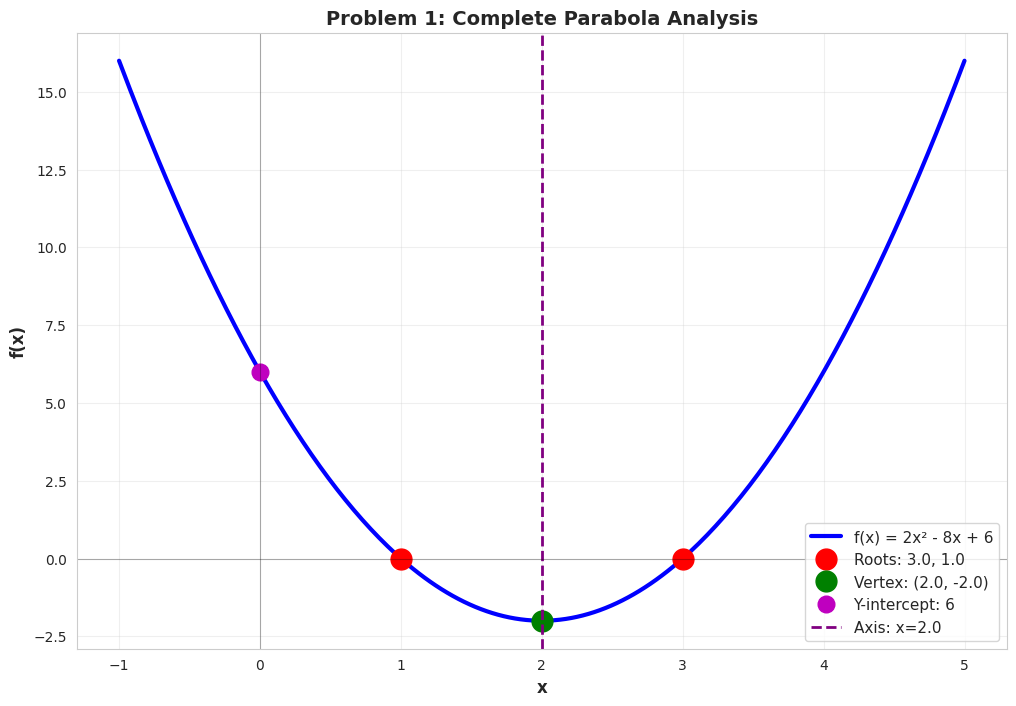

In [ ]:
# Basketball Shot Visualization

fig, axes = plt.subplots(2, 2, figsize=(16, 13))

for idx, (v, angle, label) in enumerate(test_scenarios):
    ax = axes[idx // 2, idx % 2]
    
    x_traj, y_traj, _, _, _ = simulate_projectile(v, angle, release_height)
    
    # Check if it goes through hoop (within small margin)
    hoop_margin = 0.2
    hoop_x_idx = np.argmin(np.abs(x_traj - hoop_distance))
    y_at_hoop = y_traj[hoop_x_idx]
    
    success = abs(y_at_hoop - hoop_height) < hoop_margin
    color = 'green' if success else 'red'
    status = "✓ Makes it!" if success else "✗ Misses"
    
    ax.plot(x_traj, y_traj, color=color, linewidth=3, label=f'{label} ({status})')
    ax.plot(0, release_height, 'bo', markersize=12, label='Release Point')
    ax.plot(hoop_distance, hoop_height, 'ro', markersize=15, label='Hoop')
    ax.axhline(y=0, color='brown', linewidth=3, alpha=0.5)
    
    # Draw backboard
    ax.plot([hoop_distance, hoop_distance], [hoop_height - 0.5, hoop_height + 0.5],
           'k-', linewidth=5)
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Distance (m)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Height (m)', fontsize=11, fontweight='bold')
    ax.set_title(f'v₀ = {v} m/s, θ = {angle}° | {label}',
                fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_xlim(-0.5, 10)
    ax.set_ylim(0, 8)

plt.suptitle('Basketball Shot Analysis - Parabolic Trajectories',
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("   • Projectile motion follows a parabolic (quadratic) path")
print("   • 45° angle maximizes range (for level ground)")
print("   • Higher angles give more height but less range")
print("   • Real applications: sports, robotics, game physics")

In [ ]:
# Problem 1 Visualization

fig, ax = plt.subplots(figsize=(12, 8))
x = np.linspace(-1, 5, 300)
y = a*x**2 + b*x + c

ax.plot(x, y, 'b-', linewidth=3, label='f(x) = 2x² - 8x + 6')
ax.plot([root1, root2], [0, 0], 'ro', markersize=15, label=f'Roots: {root1}, {root2}')
ax.plot(h, k, 'go', markersize=15, label=f'Vertex: ({h}, {k})')
ax.plot(0, y_int, 'mo', markersize=12, label=f'Y-intercept: {y_int}')
ax.axvline(x=h, color='purple', linestyle='--', linewidth=2, label=f'Axis: x={h}')
ax.axhline(y=0, color='k', linewidth=0.8, linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linewidth=0.8, linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax.set_title('Problem 1: Complete Parabola Analysis', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
plt.show()


PROBLEM 2: OPTIMIZATION - FENCING PROBLEM

Given: 100 meters of fencing, one side against barn

1. Express area A as function of width w:
   Length = 100 - 2w (two widths, one length)
   Area A(w) = w × (100 - 2w)
   A(w) = 100w - 2w²

2. This is a quadratic function:
   A(w) = -2w² + 100w + 0
   Form: ax² + bx + c with a=-2, b=100, c=0

3. Dimensions for maximum area:
   Optimal width: w = -100/(2×-2) = 25.0 m
   Optimal length: L = 100 - 2(25.0) = 50.0 m

4. Maximum area:
   A_max = 25.0 × 50.0 = 1250.0 m²


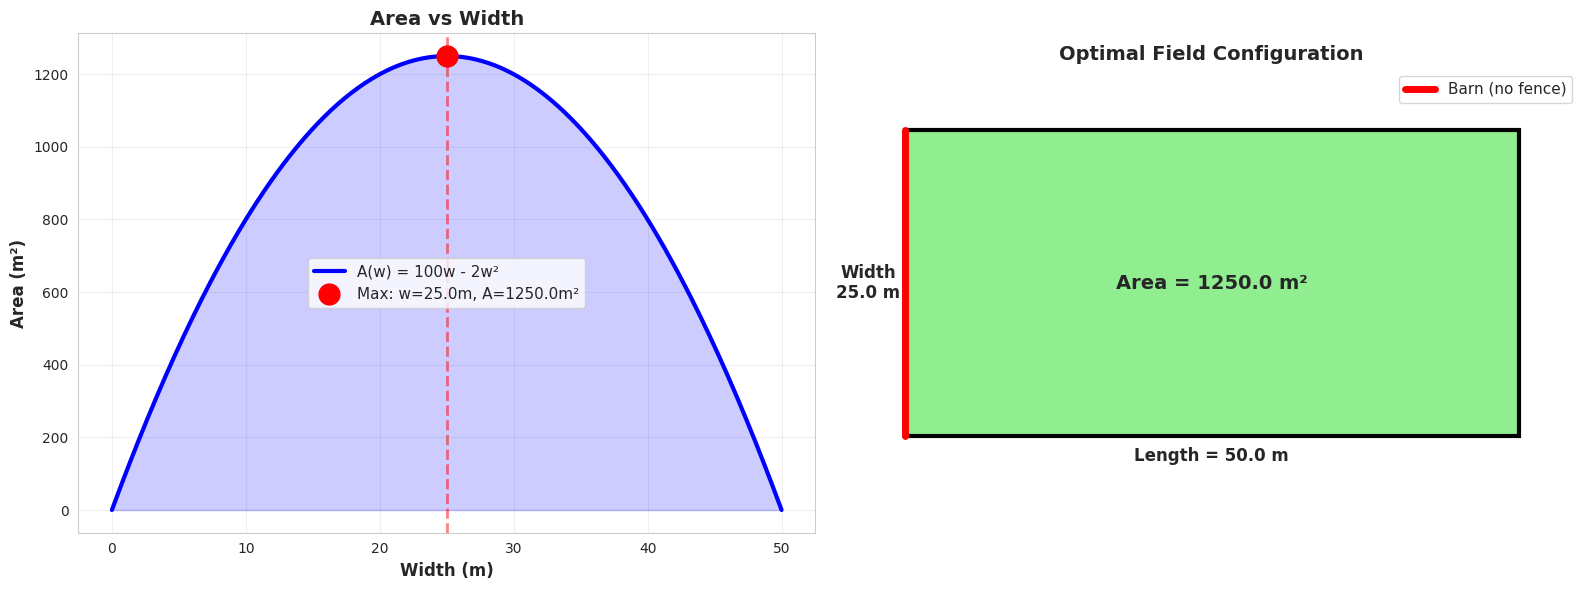

In [ ]:
# Problem 2: Optimization (Fencing Problem)

print("\n" + "="*70)
print("PROBLEM 2: OPTIMIZATION - FENCING PROBLEM")
print("="*70)

print("\nGiven: 100 meters of fencing, one side against barn")
total_fence = 100

# 1. Express area as function of width
print("\n1. Express area A as function of width w:")
print("   Length = 100 - 2w (two widths, one length)")
print("   Area A(w) = w × (100 - 2w)")
print("   A(w) = 100w - 2w²")

# 2. Show it's quadratic
print("\n2. This is a quadratic function:")
print("   A(w) = -2w² + 100w + 0")
print("   Form: ax² + bx + c with a=-2, b=100, c=0")

# 3. Find maximum
a_fence = -2
b_fence = 100
w_opt = -b_fence / (2*a_fence)
length_opt = total_fence - 2*w_opt
A_max = w_opt * length_opt

print("\n3. Dimensions for maximum area:")
print(f"   Optimal width: w = -100/(2×-2) = {w_opt} m")
print(f"   Optimal length: L = 100 - 2({w_opt}) = {length_opt} m")

print("\n4. Maximum area:")
print(f"   A_max = {w_opt} × {length_opt} = {A_max} m²")

In [ ]:
# Problem 2 Visualization

# 5. Visualize
w = np.linspace(0, 50, 300)
A = w * (100 - 2*w)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Area vs Width
ax1.plot(w, A, 'b-', linewidth=3, label='A(w) = 100w - 2w²')
ax1.plot(w_opt, A_max, 'ro', markersize=15,
        label=f'Max: w={w_opt}m, A={A_max}m²')
ax1.axvline(x=w_opt, color='r', linestyle='--', linewidth=2, alpha=0.5)
ax1.fill_between(w, 0, A, alpha=0.2, color='blue')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Width (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Area (m²)', fontsize=12, fontweight='bold')
ax1.set_title('Area vs Width', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Field diagram
ax2.add_patch(plt.Rectangle((0, 0), length_opt, w_opt, 
             fill=True, facecolor='lightgreen', edgecolor='black', linewidth=3))
ax2.plot([0, 0], [0, w_opt], 'r-', linewidth=5, label='Barn (no fence)')
ax2.text(length_opt/2, w_opt/2, f'Area = {A_max} m²', 
        ha='center', va='center', fontsize=14, fontweight='bold')
ax2.text(length_opt/2, -2, f'Length = {length_opt} m', 
        ha='center', fontsize=12, fontweight='bold')
ax2.text(-3, w_opt/2, f'Width\n{w_opt} m', 
        ha='center', va='center', fontsize=12, fontweight='bold')
ax2.set_xlim(-5, 55)
ax2.set_ylim(-5, 30)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('Optimal Field Configuration', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()


PROBLEM 3: PROJECTILE MOTION

Given: v₀ = 25 m/s, θ = 60°

1. Maximum height:
   h_max = v₀²sin²(θ) / (2g)
   h_max = 25² × sin²(60°) / (2 × 9.8)
   h_max = 23.92 m

2. Time to reach max height:
   t = v₀sin(θ) / g
   t = 25 × sin(60°) / 9.8
   t = 2.21 s

3. Total time in air:
   t_total = 2 × 2.21 = 4.42 s

4. Horizontal range:
   R = v₀²sin(2θ) / g
   R = 25² × sin(120°) / 9.8
   R = 55.23 m

5. Height when x = 15 m:
   Time: t = x / (v₀cos(θ)) = 1.20 s
   Height: y = 18.92 m

6. See trajectory plot below


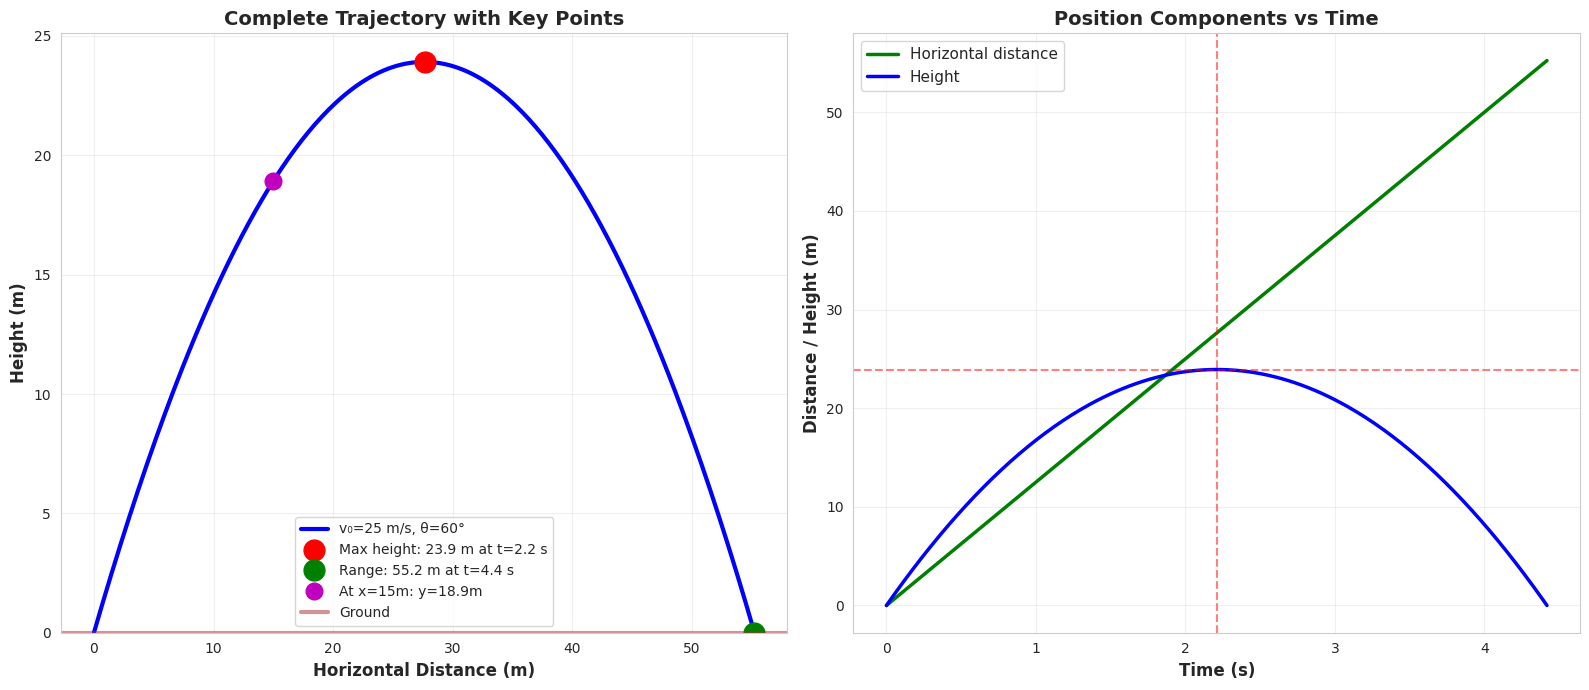


✅ ALL PROBLEMS COMPLETED


In [ ]:
# Problem 3: Projectile Motion

print("\n" + "="*70)
print("PROBLEM 3: PROJECTILE MOTION")
print("="*70)

v0 = 25  # m/s
theta_deg = 60
g = 9.8  # m/s²

theta = np.radians(theta_deg)
print(f"\nGiven: v₀ = {v0} m/s, θ = {theta_deg}°")

# 1. Maximum height
h_max = (v0**2 * np.sin(theta)**2) / (2*g)
print(f"\n1. Maximum height:")
print(f"   h_max = v₀²sin²(θ) / (2g)")
print(f"   h_max = {v0}² × sin²({theta_deg}°) / (2 × {g})")
print(f"   h_max = {h_max:.2f} m")

# 2. Time to max height
t_max_h = (v0 * np.sin(theta)) / g
print(f"\n2. Time to reach max height:")
print(f"   t = v₀sin(θ) / g")
print(f"   t = {v0} × sin({theta_deg}°) / {g}")
print(f"   t = {t_max_h:.2f} s")

# 3. Total time in air
t_total = 2 * t_max_h
print(f"\n3. Total time in air:")
print(f"   t_total = 2 × {t_max_h:.2f} = {t_total:.2f} s")

# 4. Horizontal range
range_x = (v0**2 * np.sin(2*theta)) / g
print(f"\n4. Horizontal range:")
print(f"   R = v₀²sin(2θ) / g")
print(f"   R = {v0}² × sin({2*theta_deg}°) / {g}")
print(f"   R = {range_x:.2f} m")

# 5. Height at x = 15m
x_target = 15
t_at_x = x_target / (v0 * np.cos(theta))
y_at_x = v0 * np.sin(theta) * t_at_x - 0.5 * g * t_at_x**2
print(f"\n5. Height when x = {x_target} m:")
print(f"   Time: t = x / (v₀cos(θ)) = {t_at_x:.2f} s")
print(f"   Height: y = {y_at_x:.2f} m")

print("\n6. See trajectory plot below")

# Problem 3 Visualization

# 6. Plot trajectory
t = np.linspace(0, t_total, 300)
x_traj = v0 * np.cos(theta) * t
y_traj = v0 * np.sin(theta) * t - 0.5 * g * t**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Trajectory
ax1.plot(x_traj, y_traj, 'b-', linewidth=3, label=f'v₀={v0} m/s, θ={theta_deg}°')
ax1.plot(x_traj[np.argmax(y_traj)], h_max, 'ro', markersize=15,
        label=f'Max height: {h_max:.1f} m at t={t_max_h:.1f} s')
ax1.plot(range_x, 0, 'go', markersize=15,
        label=f'Range: {range_x:.1f} m at t={t_total:.1f} s')
ax1.plot(x_target, y_at_x, 'mo', markersize=12,
        label=f'At x={x_target}m: y={y_at_x:.1f}m')
ax1.axhline(y=0, color='brown', linewidth=3, alpha=0.5, label='Ground')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Horizontal Distance (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Height (m)', fontsize=12, fontweight='bold')
ax1.set_title('Complete Trajectory with Key Points', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(bottom=0)

# Plot 2: Height and Range vs Time
ax2.plot(t, x_traj, 'g-', linewidth=2.5, label='Horizontal distance')
ax2.plot(t, y_traj, 'b-', linewidth=2.5, label='Height')
ax2.axhline(y=h_max, color='r', linestyle='--', linewidth=1.5, alpha=0.5)
ax2.axvline(x=t_max_h, color='r', linestyle='--', linewidth=1.5, alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Time (s)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Distance / Height (m)', fontsize=12, fontweight='bold')
ax2.set_title('Position Components vs Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ ALL PROBLEMS COMPLETED")
print("="*70)